# Understanding what drives prices of ride-hailing services
### Notebook 1


Antonio Montilla

Madrid, 13 November 2023

## Introduction and motivation

- In the era of app-based transportation services, companies like Uber and Lyft have revolutionized the traditional taxi model by implementing sophisticated technologies. 
- Through a centralized and automated system, these ride-hailing giants connect passengers with drivers in a dynamic, two-sided marketplace. 
- However, unlike conventional taxi services, the pricing strategies employed by these companies extend beyond mere distance calculations, incorporating a set of undisclosed factors.
- Central to this pricing approach is the concept of dynamic pricing - a complex algorithm that adapts rates based on various variables impacting the timing of the ride. Factors such as traffic conditions, extreme weather, and specific times of the day or week contribute to the dynamic nature of these pricing models. As Uber acknowledges, this may result in temporary price increases during peak demand periods (see [Uber Blog](https://www.uber.com/en-GB/blog/uber-dynamic-pricing/#:~:text=That%27s%20because%20of%20our%20dynamic,price%20during%20particularly%20busy%20periods.)).
- The ride-hailing companies argue that such dynamic pricing algorithms effectively address imbalances between ride supply and demand, thereby enhancing the overall experience for both riders and drivers. However, the lack of transparency surrounding the parameters and inputs of these algorithms raises questions about the fairness and understanding of the pricing mechanism.
- This project aims to unveil some of the variables influencing dynamic pricing algorithms, with a specific focus on how weather conditions and the time of day or week impact ride costs. 
- Leveraging data obtained through Uber and Lyft APIs and accessible on Kaggle ([Dataset Link](https://www.kaggle.com/datasets/ravi72munde/uber-lyft-cab-prices?select=cab_rides.csv)), we delve into a dataset comprising 693,071 rows of simulated rides with real prices. Collected in the city of Boston in November 2018 for 12 specific districts, this dataset serves as the foundation for our exploration into the intricate dynamics of ride-hailing pricing strategies.

## Objectives

1) **Examime pricing patterns.** Explore and analyse the database published in Kaggle to better understand the distribution of ride-hailing prices during the day and week.
2) **Uncover the impact of weather.** Connect this dataset with weather conditions, with the aim to explore how the weather affects ride-hailing prices.
3) **Comprehensive Exploratory Data Analysis (EDA).** Conduct a through Exploratory Data Analysis of the combined dataset. Employing statistical and visual techniques, this step seeks to uncover correlations, trends, and anomalies, laying the groundwork for subsequent modeling.
4) **Machine Learning Regression Modelling.** Utilize machine learning techniques to construct a regression model predicting ride-hailing prices based on selected features.
5) **Model Evaluation and Selection.** Compare different regression models for selecting the algorithm that best fit the dataset.
6) **Analyse Model Parameters and Conclude.** Investigate the weight and significance of each feature in the regression model. This analysis serves as compelling evidence for understanding how dynamic pricing mechanisms operate, offering valuable insights into the factors that exert the most influence on ride costs.

Note: this jupyper notebook focuses on objectives (1) and (2) and partly on (3), which would be completed in a Tableau notebook. Objectives (4), (5) and (6) will be tackle in a separate jupyter notebook.

## Importing libraries

In [1]:
# Data analysis
import pandas as pd
import numpy as np
import random as rnd
from pandas import read_csv
from scipy.stats import ttest_1samp #hypothesis testing

# Data visualization (note that this process will also be conducted in Tableau)
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats 
import matplotlib.pyplot as plt

#Data transformation
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

## Predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Importing the database and preliminary exploratory analysis

In [2]:
price_df = pd.read_csv('cab_rides.csv')

In [3]:
price_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [4]:
price_df.shape

(693071, 10)

In [5]:
price_df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [6]:
price_df.info

<bound method DataFrame.info of         distance cab_type     time_stamp    destination            source  \
0           0.44     Lyft  1544952607890  North Station  Haymarket Square   
1           0.44     Lyft  1543284023677  North Station  Haymarket Square   
2           0.44     Lyft  1543366822198  North Station  Haymarket Square   
3           0.44     Lyft  1543553582749  North Station  Haymarket Square   
4           0.44     Lyft  1543463360223  North Station  Haymarket Square   
...          ...      ...            ...            ...               ...   
693066      1.00     Uber  1543708385534      North End          West End   
693067      1.00     Uber  1543708385534      North End          West End   
693068      1.00     Uber  1543708385534      North End          West End   
693069      1.00     Uber  1543708385534      North End          West End   
693070      1.00     Uber  1543708385534      North End          West End   

        price  surge_multiplier            

In [7]:
price_df.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
distance,693071.0,NaN,NaN,NaN,2.18943,1.138937,0.02,1.28,2.16,2.92,7.86
cab_type,693071,2,Uber,385663,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_stamp,693071.0,NaN,NaN,NaN,1544045709764.357178,689192492.400427,1543203646318.0,1543443968356.5,1543737477529.0,1544827508976.5,1545160510943.0
destination,693071,12,Financial District,58851,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,693071,12,Financial District,58857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,637976.0,NaN,NaN,NaN,16.545125,9.324359,2.5,9.0,13.5,22.5,97.5
surge_multiplier,693071.0,NaN,NaN,NaN,1.01387,0.091641,1.0,1.0,1.0,1.0,3.0
id,693071,693071,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,693071,13,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,55096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,693071,13,UberXL,55096,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Preliminary observations:**
- The dataset has 693,071 rows of rides with 10 columns.
- Price: numeric column containing the estimated price of each ride in USD, the target variable.
- Distance: numeric column with the distance between source and destination.
- Surge_multiplier: numeric column that defines if the trip involves surge multiplier, ie increase in prices.
- Time_stamp: numeric column containing date of the requested trip. Will probably need to transform to datetime.
- Destination: categorical column with the destination of the requested ride.
- Source: categorical column with the source of the requested ride.
- Cab_type: categorical column with type of cab (Uber or Lyft).
- Name: categorical column with name/catgory of the requested ride (e.g. UberXL).
- Product_id: categorical column that identifies the product.
- id: categorical column that identifies each ride.


## Cleaning price dataset

#### Checking for duplicates

In [8]:
display(price_df.duplicated().sum())
price_df = price_df.drop_duplicates()
display(price_df.shape)

0

(693071, 10)

#### Checking for NaNs or nulls values

In [9]:
price_df.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [10]:
total = price_df.isnull().sum().sort_values(ascending = False) #adding NaNs by column
percentage = (price_df.isnull().sum()/price_df.isnull().count()*100).sort_values(ascending = False) #% of total
missing_data  = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage']) #df para explorar
missing_data

,Total,Percentage
price,55095,7.949402
distance,0,0.000000
cab_type,0,0.000000
time_stamp,0,0.000000
destination,0,0.000000
source,0,0.000000
surge_multiplier,0,0.000000
id,0,0.000000
product_id,0,0.000000
name,0,0.000000


- The target variable has 55,095 NaNs, which is around 8% of total observations.
- As the dataset is large enough and the missing data is for the target column, I have decided to drop the missing rows and work the remaining dataset.
- The resulting dataset has a shape of 637,976 rows and still the 10 columns.

In [11]:
price_df = price_df.dropna(axis = 0).reset_index(drop=True)
price_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
637971,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
637972,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
637973,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
637974,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [12]:
#checking there are none NaNs now:
price_df.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

## Importing the dataframe 'weather'

In [13]:
weather_df = pd.read_csv('weather.csv')
weather_df

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


## Cleaning weather dataset

#### Checking for duplicates

In [14]:
display(weather_df.duplicated().sum())
weather_df = weather_df.drop_duplicates()
display(weather_df.shape)

0

(6276, 8)

#### Checking for NaNs or nulls values

In [15]:
weather_df.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

0.0002

0.7807

/var/folders/ws/0xbhg9d95hd9g5nvrfz8pwk40000gn/T/ipykernel_53465/2042615406.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather_df.rain)


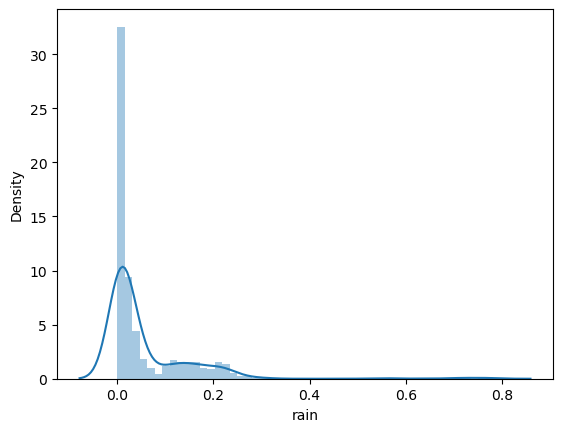

In [16]:
#there are 5382 NaNs in rain, looking a bit closer to the distribution of rain, as NaN could well indicate 0 rain:
display(weather_df['rain'].min())
display(weather_df['rain'].max())
sns.distplot(weather_df.rain)
plt.show()

In [17]:
#as expected, NaNs values in rain corresponds with no rain. Will fill NaN with zero.
weather_df['rain'] = weather_df['rain'].fillna(0)

In [18]:
weather_df.isnull().sum()

temp          0
location      0
clouds        0
pressure      0
rain          0
time_stamp    0
humidity      0
wind          0
dtype: int64

## Merging weather_df to price_df
- The two dataframes have time_stamp which could serve as input for a key to merge the information.
- However, time_stamp does not coincide exactly, as the exact time taken to request trips and weather could differ.
- To contruct an appropiate key, I will take the 'date' and 'hour' from the time_stamp and the location (from either 'source' or 'location') to build a new column with a string 'location' - 'date' - 'hour' and use it as key for merging.
- Beforehand, I need to convert time_stamp into a datetime.
- A key issue is that the weather could have been taken at different minutes within the same hour and this could duplicate some rows when merging. 
- To solve this issue, I will create a new dataframe with the average weather conditions per hour and date and use it to construct a key for merging with price_df.

In [19]:
#adding the new "key" column in price_df
price_df["datetime"]=pd.to_datetime(price_df["time_stamp"]/1000, unit='s')
price_df['key'] = price_df.source.astype(str) +" - "+ price_df.datetime.dt.date.astype("str")+ " - " + price_df.datetime.dt.hour.astype("str")
price_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,key
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000128,Haymarket Square - 2018-12-16 - 9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.676999936,Haymarket Square - 2018-11-27 - 2
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999872,Haymarket Square - 2018-11-28 - 1
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000192,Haymarket Square - 2018-11-30 - 4
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000064,Haymarket Square - 2018-11-29 - 3
...,...,...,...,...,...,...,...,...,...,...,...,...
637971,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-12-01 23:53:05.533999872,West End - 2018-12-01 - 23
637972,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-12-01 23:53:05.533999872,West End - 2018-12-01 - 23
637973,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-01 23:53:05.533999872,West End - 2018-12-01 - 23
637974,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-01 23:53:05.533999872,West End - 2018-12-01 - 23


In [20]:
#For weather, I will first create a new column "datetime" from "time_stamp"
weather_df["datetime"]=pd.to_datetime(weather_df["time_stamp"], unit='s')
#and will add "date", "day", and "hour" from this column
weather_df["date"] = weather_df.datetime.dt.date #actual date
weather_df["hour"] = weather_df.datetime.dt.hour #0-24
weather_df

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,datetime,date,hour
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16 23:45:01,2018-12-16,23
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16 23:45:01,2018-12-16,23
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16 23:45:01,2018-12-16,23
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16 23:45:01,2018-12-16,23
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16 23:45:01,2018-12-16,23
...,...,...,...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,0.0000,1543819974,0.96,1.52,2018-12-03 06:52:54,2018-12-03,6
6272,44.85,Northeastern University,0.88,1000.71,0.0000,1543819974,0.96,1.54,2018-12-03 06:52:54,2018-12-03,6
6273,44.82,South Station,0.89,1000.70,0.0000,1543819974,0.96,1.54,2018-12-03 06:52:54,2018-12-03,6
6274,44.78,Theatre District,0.89,1000.70,0.0000,1543819974,0.96,1.54,2018-12-03 06:52:54,2018-12-03,6


In [21]:
#the following step is creating the correct key:
#the problem is that there could be more than 1 row where the values of date and hour repeats.
#this will duplicate some rows when trying to merge with the price_df (it duplicates in total 529.754 observations).
#to avoid this, I will create a new dataframe weather that will take the average of columns per location, date and hour.
averaged_weather = weather_df.groupby(['location', 'date', 'hour']).agg({
    'temp': 'mean',
    'clouds': 'mean',
    'pressure': 'mean',
    'rain': 'mean',
    'humidity': 'mean',
    'wind': 'mean'
}).reset_index()

In [22]:
#will add the 'key' column into the 'averaged_weather' df:
averaged_weather['key'] = averaged_weather.location.astype(str) +" - "+ averaged_weather.date.astype("str")+ " - " + averaged_weather.hour.astype("str")
averaged_weather

,location,date,hour,temp,clouds,pressure,rain,humidity,wind,key
0,Back Bay,2018-11-26,3,41.040000,0.870000,1014.390000,0.0,0.920000,1.460000,Back Bay - 2018-11-26 - 3
1,Back Bay,2018-11-26,4,40.658000,0.894000,1014.008000,0.0,0.926000,2.646000,Back Bay - 2018-11-26 - 4
2,Back Bay,2018-11-26,5,40.561250,0.930000,1013.821250,0.0,0.921250,2.496250,Back Bay - 2018-11-26 - 5
3,Back Bay,2018-11-26,6,40.627333,0.990667,1014.196667,0.0,0.913333,1.350667,Back Bay - 2018-11-26 - 6
4,Back Bay,2018-11-26,7,41.137500,0.970000,1014.292500,0.0,0.920000,1.735000,Back Bay - 2018-11-26 - 7
...,...,...,...,...,...,...,...,...,...,...
3955,West End,2018-12-18,14,26.190000,0.480000,1010.120000,0.0,0.470000,13.890000,West End - 2018-12-18 - 14
3956,West End,2018-12-18,15,27.220000,0.340000,1011.420000,0.0,0.460000,15.030000,West End - 2018-12-18 - 15
3957,West End,2018-12-18,16,28.700000,0.310000,1011.480000,0.0,0.470000,14.600000,West End - 2018-12-18 - 16
3958,West End,2018-12-18,17,30.050000,0.150000,1011.420000,0.0,0.460000,13.550000,West End - 2018-12-18 - 17


In [23]:
#now merging the two datasets price_df and averaged_weather

total_df = pd.merge(left = price_df,
                                 right = averaged_weather,
                                 how = 'left', 
                                 left_on = "key", 
                                 right_on= "key")

In [24]:
total_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,key,location,date,hour,temp,clouds,pressure,rain,humidity,wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,Haymarket Square - 2018-12-16 - 9,Haymarket Square,2018-12-16,9.0,38.460,0.290000,1022.25,0.000,0.760000,7.68
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,Haymarket Square - 2018-11-27 - 2,Haymarket Square,2018-11-27,2.0,44.065,0.995000,1002.88,0.106,0.895000,12.63
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,Haymarket Square - 2018-11-28 - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,Haymarket Square - 2018-11-30 - 4,Haymarket Square,2018-11-30,4.0,35.080,0.000000,1013.71,0.000,0.700000,5.25
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,Haymarket Square - 2018-11-29 - 3,Haymarket Square,2018-11-29,3.0,37.680,0.433333,998.42,0.000,0.706667,11.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,West End - 2018-12-01 - 23,West End,2018-12-01,23.0,36.690,0.410000,1023.64,0.000,0.760000,2.51
637972,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,West End - 2018-12-01 - 23,West End,2018-12-01,23.0,36.690,0.410000,1023.64,0.000,0.760000,2.51
637973,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,West End - 2018-12-01 - 23,West End,2018-12-01,23.0,36.690,0.410000,1023.64,0.000,0.760000,2.51
637974,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,West End - 2018-12-01 - 23,West End,2018-12-01,23.0,36.690,0.410000,1023.64,0.000,0.760000,2.51


## Initial data exploration and cleaning of total_df

In [25]:
display(total_df.shape)

(637976, 21)

In [26]:
display(total_df.columns)

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'key',
       'location', 'date', 'hour', 'temp', 'clouds', 'pressure', 'rain',
       'humidity', 'wind'],
      dtype='object')

In [27]:
total_df.dtypes

distance                   float64
cab_type                    object
time_stamp                   int64
destination                 object
source                      object
price                      float64
surge_multiplier           float64
id                          object
product_id                  object
name                        object
datetime            datetime64[ns]
key                         object
location                    object
date                        object
hour                       float64
temp                       float64
clouds                     float64
pressure                   float64
rain                       float64
humidity                   float64
wind                       float64
dtype: object

#### Working with time_stamp

In [28]:
#1) I will first drop columns related to datetime from "weather" and ensure I get the exact time from "time_stamp" from the "price_df":
total_df = total_df.drop(['datetime', 'date', 'hour'], axis = 1)

#2) will add a new column declaring time_stamp as datetime
total_df["datetime"]=pd.to_datetime(total_df["time_stamp"]/1000, unit='s')
total_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,key,location,temp,clouds,pressure,rain,humidity,wind,datetime
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,Haymarket Square - 2018-12-16 - 9,Haymarket Square,38.460,0.290000,1022.25,0.000,0.760000,7.68,2018-12-16 09:30:07.890000128
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,Haymarket Square - 2018-11-27 - 2,Haymarket Square,44.065,0.995000,1002.88,0.106,0.895000,12.63,2018-11-27 02:00:23.676999936
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,Haymarket Square - 2018-11-28 - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-28 01:00:22.197999872
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,Haymarket Square - 2018-11-30 - 4,Haymarket Square,35.080,0.000000,1013.71,0.000,0.700000,5.25,2018-11-30 04:53:02.749000192
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,Haymarket Square - 2018-11-29 - 3,Haymarket Square,37.680,0.433333,998.42,0.000,0.706667,11.16,2018-11-29 03:49:20.223000064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,West End - 2018-12-01 - 23,West End,36.690,0.410000,1023.64,0.000,0.760000,2.51,2018-12-01 23:53:05.533999872
637972,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,West End - 2018-12-01 - 23,West End,36.690,0.410000,1023.64,0.000,0.760000,2.51,2018-12-01 23:53:05.533999872
637973,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,West End - 2018-12-01 - 23,West End,36.690,0.410000,1023.64,0.000,0.760000,2.51,2018-12-01 23:53:05.533999872
637974,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,West End - 2018-12-01 - 23,West End,36.690,0.410000,1023.64,0.000,0.760000,2.51,2018-12-01 23:53:05.533999872


In [29]:
#3) adding new columns with the day of the week and the hour of the day
total_df['day'] = total_df.datetime.dt.dayofweek #0-6, where 0: Monday ... and 6: Sunday
total_df['hour'] = total_df.datetime.dt.hour #0-24
total_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,location,temp,clouds,pressure,rain,humidity,wind,datetime,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,Haymarket Square,38.460,0.290000,1022.25,0.000,0.760000,7.68,2018-12-16 09:30:07.890000128,6,9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,Haymarket Square,44.065,0.995000,1002.88,0.106,0.895000,12.63,2018-11-27 02:00:23.676999936,1,2
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-28 01:00:22.197999872,2,1
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,Haymarket Square,35.080,0.000000,1013.71,0.000,0.700000,5.25,2018-11-30 04:53:02.749000192,4,4
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,Haymarket Square,37.680,0.433333,998.42,0.000,0.706667,11.16,2018-11-29 03:49:20.223000064,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,West End,36.690,0.410000,1023.64,0.000,0.760000,2.51,2018-12-01 23:53:05.533999872,5,23
637972,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,West End,36.690,0.410000,1023.64,0.000,0.760000,2.51,2018-12-01 23:53:05.533999872,5,23
637973,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,West End,36.690,0.410000,1023.64,0.000,0.760000,2.51,2018-12-01 23:53:05.533999872,5,23
637974,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,West End,36.690,0.410000,1023.64,0.000,0.760000,2.51,2018-12-01 23:53:05.533999872,5,23


#### Dropping columns that will not be used in the EDA or modelling

In [30]:
#columns that will not be used in EDA or modelling: 'time_stamp', 'id', 'product_id', 'key', 'location'
total_df.columns
total_df = total_df.drop(['time_stamp', 'id', 'product_id', 'key', 'location'], axis = 1)
total_df

,distance,cab_type,destination,source,price,surge_multiplier,name,temp,clouds,pressure,rain,humidity,wind,datetime,day,hour
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,38.460,0.290000,1022.25,0.000,0.760000,7.68,2018-12-16 09:30:07.890000128,6,9
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,44.065,0.995000,1002.88,0.106,0.895000,12.63,2018-11-27 02:00:23.676999936,1,2
2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,Lyft,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-28 01:00:22.197999872,2,1
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL,35.080,0.000000,1013.71,0.000,0.700000,5.25,2018-11-30 04:53:02.749000192,4,4
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,37.680,0.433333,998.42,0.000,0.706667,11.16,2018-11-29 03:49:20.223000064,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,1.00,Uber,North End,West End,9.5,1.0,WAV,36.690,0.410000,1023.64,0.000,0.760000,2.51,2018-12-01 23:53:05.533999872,5,23
637972,1.00,Uber,North End,West End,13.0,1.0,UberXL,36.690,0.410000,1023.64,0.000,0.760000,2.51,2018-12-01 23:53:05.533999872,5,23
637973,1.00,Uber,North End,West End,9.5,1.0,UberX,36.690,0.410000,1023.64,0.000,0.760000,2.51,2018-12-01 23:53:05.533999872,5,23
637974,1.00,Uber,North End,West End,27.0,1.0,Black SUV,36.690,0.410000,1023.64,0.000,0.760000,2.51,2018-12-01 23:53:05.533999872,5,23


#### Checking for duplicates

In [31]:
display(total_df.duplicated().sum())
total_df = total_df.drop_duplicates()
display(total_df.shape)

71

(637905, 16)

#### Checking for NaNs:

In [32]:
total_df.isnull().sum()

distance               0
cab_type               0
destination            0
source                 0
price                  0
surge_multiplier       0
name                   0
temp                2734
clouds              2734
pressure            2734
rain                2734
humidity            2734
wind                2734
datetime               0
day                    0
hour                   0
dtype: int64

In [33]:
#there are 2734 NaNs in the weather columns. Given the size of the dataframe, will drop these rows.
total_df = total_df.dropna(axis = 0).reset_index(drop=True)
display(total_df.isnull().sum())
display(total_df.shape)

distance            0
cab_type            0
destination         0
source              0
price               0
surge_multiplier    0
name                0
temp                0
clouds              0
pressure            0
rain                0
humidity            0
wind                0
datetime            0
day                 0
hour                0
dtype: int64

(635171, 16)

In [34]:
total_df.dtypes

distance                   float64
cab_type                    object
destination                 object
source                      object
price                      float64
surge_multiplier           float64
name                        object
temp                       float64
clouds                     float64
pressure                   float64
rain                       float64
humidity                   float64
wind                       float64
datetime            datetime64[ns]
day                          int64
hour                         int64
dtype: object

## Looking at 'cab_type' and 'name' and deciding whether to select certain data

- The 'cab_type' column shows the service provider, Uber or Lyft. Will look at the distribution of this column to decide whether to keep only 1 of the 2.

In [35]:
total_df['cab_type'].value_counts(dropna = False)

Uber    329090
Lyft    306081
Name: cab_type, dtype: int64

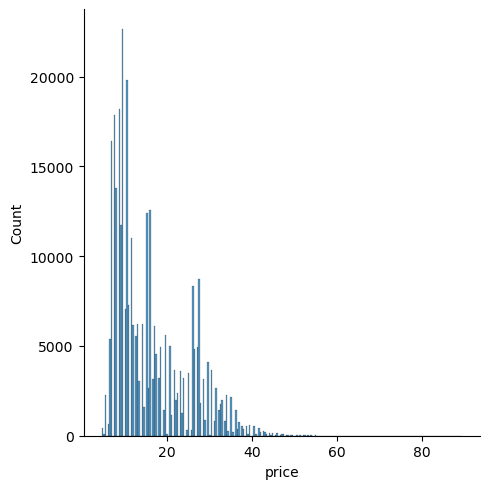

In [36]:
uber_df = total_df[total_df['cab_type'] == 'Uber']
sns.displot(uber_df.price)
plt.show()

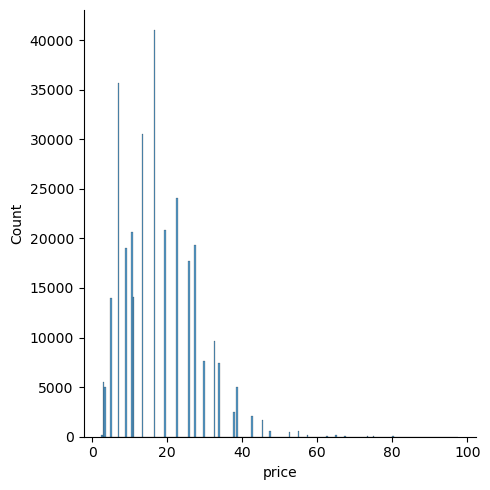

In [37]:
lyft_df = total_df[total_df['cab_type'] == 'Lyft']
sns.displot(lyft_df.price)
plt.show()

/var/folders/ws/0xbhg9d95hd9g5nvrfz8pwk40000gn/T/ipykernel_53465/827291696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyft_df['price_per_distance'] = lyft_df['price']/lyft_df['distance']
/var/folders/ws/0xbhg9d95hd9g5nvrfz8pwk40000gn/T/ipykernel_53465/827291696.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_df['price_per_distance'] = uber_df['price']/uber_df['distance']


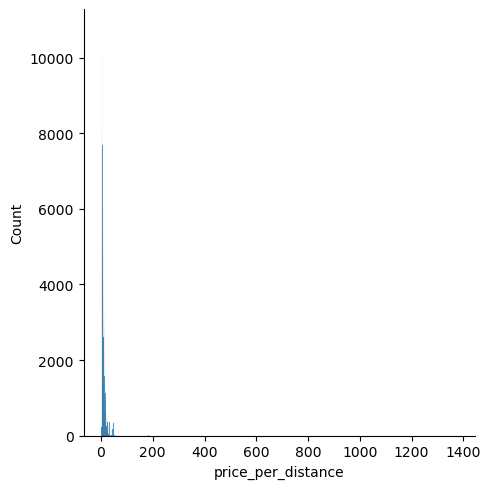

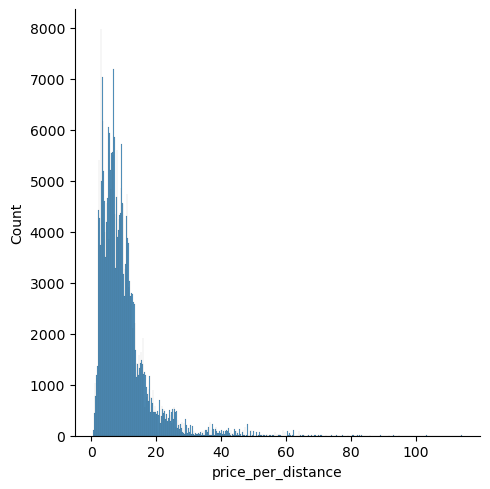

In [38]:
#will repeat the procedure but adjusting the price per distance.
#will add a new column in each dataframe with price/distance
lyft_df['price_per_distance'] = lyft_df['price']/lyft_df['distance']
uber_df['price_per_distance'] = uber_df['price']/uber_df['distance']
sns.displot(uber_df.price_per_distance)
plt.show()
sns.displot(lyft_df.price_per_distance)
plt.show()

- As the price shows significant differences between Uber and Lyft, I have decided to keep only observations from Uber. From now on I will be using uber_df-
- This will make the analysis more roboust as each company follows a different algorithm for setting prices.
- I will, however, export the lyft_csv as I will be using it for a separate analysis later on.

In [39]:
#exporting the lyft df
lyft_df.to_csv('lyft_df.csv', index=False)

<Axes: xlabel='name', ylabel='price_per_distance'>

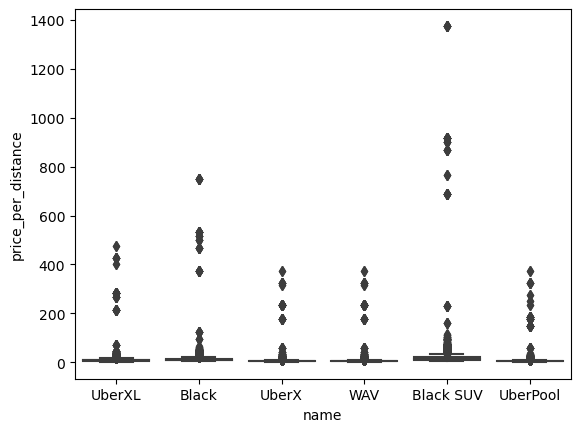

In [40]:
#looking at the relationship between type of service 'name' and prices:
sns.boxplot(data=uber_df, x="name", y="price_per_distance")

In [41]:
#name and prices
uber_df['name'].value_counts(dropna = False)

UberXL       54859
UberPool     54856
WAV          54850
Black        54842
UberX        54842
Black SUV    54841
Name: name, dtype: int64

In [42]:
#looking at average price_per_distance per 'name'
average_price_per_name = uber_df.groupby('name')['price_per_distance'].mean()
average_price_per_name

name
Black        12.367534
Black SUV    19.430196
UberPool      5.337707
UberX         5.944093
UberXL        9.134084
WAV           5.944612
Name: price_per_distance, dtype: float64

- The premium/luxury services 'Black' and 'Black SUV' showed significant differences in pricing when compared to other standard services.
- Given that the objective of this project is to understand how dynamic pricing works for a standard service, I have decided to drop the rows with 'Black' and 'Black SUV' premium services, as these could distort my results.

In [43]:
uber_df = uber_df[~uber_df['name'].isin(['Black', 'Black SUV'])]
display(uber_df['name'].value_counts(dropna = False))
uber_df

UberXL      54859
UberPool    54856
WAV         54850
UberX       54842
Name: name, dtype: int64

,distance,cab_type,destination,source,price,surge_multiplier,name,temp,clouds,pressure,rain,humidity,wind,datetime,day,hour,price_per_distance
11,1.11,Uber,West End,North End,12.0,1.0,UberXL,38.65,0.96,1017.23,0.0000,0.65,3.13,2018-11-30 22:13:01.178999808,4,22,10.810811
13,1.11,Uber,West End,North End,7.5,1.0,UberX,32.75,0.51,1033.75,0.0000,0.57,1.90,2018-12-13 19:15:03.935000064,3,19,6.756757
14,1.11,Uber,West End,North End,7.5,1.0,WAV,42.36,1.00,1012.15,0.2088,0.77,11.46,2018-12-16 23:55:11.430000128,6,23,6.756757
16,1.11,Uber,West End,North End,5.5,1.0,UberPool,42.48,0.58,1007.66,0.0000,0.54,10.84,2018-11-29 19:18:00.802000128,3,19,4.954955
23,2.48,Uber,South Station,Beacon Hill,8.5,1.0,WAV,40.00,0.82,999.92,0.0000,0.74,9.23,2018-12-17 20:40:09.832000000,0,20,3.427419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635163,1.61,Uber,Haymarket Square,Theatre District,15.0,1.0,WAV,37.01,0.83,1021.65,0.0000,0.85,1.60,2018-12-02 05:28:04.148999936,6,5,9.316770
635166,1.00,Uber,North End,West End,9.5,1.0,WAV,36.69,0.41,1023.64,0.0000,0.76,2.51,2018-12-01 23:53:05.533999872,5,23,9.500000
635167,1.00,Uber,North End,West End,13.0,1.0,UberXL,36.69,0.41,1023.64,0.0000,0.76,2.51,2018-12-01 23:53:05.533999872,5,23,13.000000
635168,1.00,Uber,North End,West End,9.5,1.0,UberX,36.69,0.41,1023.64,0.0000,0.76,2.51,2018-12-01 23:53:05.533999872,5,23,9.500000


In [44]:
#dropping additional columns:
#cab_type
display(uber_df['cab_type'].value_counts())
#surge multiplier (this column was only relevant for Lyft as Uber does not disclose increase in pricing in a multiplier)
display(uber_df['surge_multiplier'].value_counts())
uber_df = uber_df.drop(['cab_type', 'surge_multiplier'], axis = 1)

Uber    219407
Name: cab_type, dtype: int64

1.0    219407
Name: surge_multiplier, dtype: int64

In [45]:
#resetting the index
uber_df = uber_df.reset_index(drop=True)
uber_df

,distance,destination,source,price,name,temp,clouds,pressure,rain,humidity,wind,datetime,day,hour,price_per_distance
0,1.11,West End,North End,12.0,UberXL,38.65,0.96,1017.23,0.0000,0.65,3.13,2018-11-30 22:13:01.178999808,4,22,10.810811
1,1.11,West End,North End,7.5,UberX,32.75,0.51,1033.75,0.0000,0.57,1.90,2018-12-13 19:15:03.935000064,3,19,6.756757
2,1.11,West End,North End,7.5,WAV,42.36,1.00,1012.15,0.2088,0.77,11.46,2018-12-16 23:55:11.430000128,6,23,6.756757
3,1.11,West End,North End,5.5,UberPool,42.48,0.58,1007.66,0.0000,0.54,10.84,2018-11-29 19:18:00.802000128,3,19,4.954955
4,2.48,South Station,Beacon Hill,8.5,WAV,40.00,0.82,999.92,0.0000,0.74,9.23,2018-12-17 20:40:09.832000000,0,20,3.427419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219402,1.61,Haymarket Square,Theatre District,15.0,WAV,37.01,0.83,1021.65,0.0000,0.85,1.60,2018-12-02 05:28:04.148999936,6,5,9.316770
219403,1.00,North End,West End,9.5,WAV,36.69,0.41,1023.64,0.0000,0.76,2.51,2018-12-01 23:53:05.533999872,5,23,9.500000
219404,1.00,North End,West End,13.0,UberXL,36.69,0.41,1023.64,0.0000,0.76,2.51,2018-12-01 23:53:05.533999872,5,23,13.000000
219405,1.00,North End,West End,9.5,UberX,36.69,0.41,1023.64,0.0000,0.76,2.51,2018-12-01 23:53:05.533999872,5,23,9.500000


## Splitting the uber_df into Categorical and Numerical

In [46]:
numerical_df = uber_df.select_dtypes(np.number)
numerical_df

,distance,price,temp,clouds,pressure,rain,humidity,wind,day,hour,price_per_distance
0,1.11,12.0,38.65,0.96,1017.23,0.0000,0.65,3.13,4,22,10.810811
1,1.11,7.5,32.75,0.51,1033.75,0.0000,0.57,1.90,3,19,6.756757
2,1.11,7.5,42.36,1.00,1012.15,0.2088,0.77,11.46,6,23,6.756757
3,1.11,5.5,42.48,0.58,1007.66,0.0000,0.54,10.84,3,19,4.954955
4,2.48,8.5,40.00,0.82,999.92,0.0000,0.74,9.23,0,20,3.427419
...,...,...,...,...,...,...,...,...,...,...,...
219402,1.61,15.0,37.01,0.83,1021.65,0.0000,0.85,1.60,6,5,9.316770
219403,1.00,9.5,36.69,0.41,1023.64,0.0000,0.76,2.51,5,23,9.500000
219404,1.00,13.0,36.69,0.41,1023.64,0.0000,0.76,2.51,5,23,13.000000
219405,1.00,9.5,36.69,0.41,1023.64,0.0000,0.76,2.51,5,23,9.500000


In [47]:
categorical_df = uber_df.select_dtypes(object)
categorical_df

,destination,source,name
0,West End,North End,UberXL
1,West End,North End,UberX
2,West End,North End,WAV
3,West End,North End,UberPool
4,South Station,Beacon Hill,WAV
...,...,...,...
219402,Haymarket Square,Theatre District,WAV
219403,North End,West End,WAV
219404,North End,West End,UberXL
219405,North End,West End,UberX


## Data Wrangling: categorical_df

In [48]:
categorical_df.columns

Index(['destination', 'source', 'name'], dtype='object')

In [49]:
#confirming value_counts in column 'name' does not include luxury services
display(categorical_df['name'].value_counts(dropna = False))

UberXL      54859
UberPool    54856
WAV         54850
UberX       54842
Name: name, dtype: int64

In [50]:
#looking at districts in columns 'destination' and 'source'
display(categorical_df['destination'].value_counts(dropna = False))
display(categorical_df['source'].value_counts(dropna = False))

Financial District         18570
Haymarket Square           18318
Theatre District           18315
North End                  18302
Fenway                     18290
Boston University          18289
West End                   18271
Back Bay                   18270
Northeastern University    18260
South Station              18242
Beacon Hill                18182
North Station              18098
Name: destination, dtype: int64

Financial District         18531
Theatre District           18375
Back Bay                   18300
Boston University          18288
Haymarket Square           18287
Fenway                     18286
Northeastern University    18285
North End                  18280
South Station              18280
West End                   18233
Beacon Hill                18193
North Station              18069
Name: source, dtype: int64

From the information disclosed in Google Maps and Wikipedia, I will classify district as the following:
- business = 'Financial District', 'South Station',  'North Station'.
- entertaiment = 'Theatre District', 'Back Bay', 'West End', 'Beacon Hill'.
- education = 'Boston University', 'Northeastern University'.
- commercial = 'Haymarket Square', 'North End'.
- other = 'Fenway'.

In [51]:
#changing the destination column:
categorical_df['destination'] = categorical_df['destination'].map({'Financial District': 'business', 'South Station': 'business', 'North Station': 'business', 'Theatre District': 'entertaiment', 'Back Bay': 'entertaiment', 'West End': 'entertaiment', 'Beacon Hill': 'entertaiment', 'Boston University': 'education', 'Northeastern University': 'education', 'Haymarket Square': 'commercial', 'North End': 'commercial', 'Fenway': 'other'})
display(categorical_df['destination'].value_counts(dropna = False))

entertaiment    73038
business        54910
commercial      36620
education       36549
other           18290
Name: destination, dtype: int64

In [52]:
#changing the source column:
categorical_df['source'] = categorical_df['source'].map({'Financial District': 'business', 'South Station': 'business', 'North Station': 'business', 'Theatre District': 'entertaiment', 'Back Bay': 'entertaiment', 'West End': 'entertaiment', 'Beacon Hill': 'entertaiment', 'Boston University': 'education', 'Northeastern University': 'education', 'Haymarket Square': 'commercial', 'North End': 'commercial', 'Fenway': 'other'})
display(categorical_df['source'].value_counts(dropna = False))

entertaiment    73101
business        54880
education       36573
commercial      36567
other           18286
Name: source, dtype: int64

In [53]:
#repeating the process in the uber_df:
uber_df['destination'] = uber_df['destination'].map({'Financial District': 'business', 'South Station': 'business', 'North Station': 'business', 'Theatre District': 'entertaiment', 'Back Bay': 'entertaiment', 'West End': 'entertaiment', 'Beacon Hill': 'entertaiment', 'Boston University': 'education', 'Northeastern University': 'education', 'Haymarket Square': 'commercial', 'North End': 'commercial', 'Fenway': 'other'})
display(uber_df['destination'].value_counts(dropna = False))
uber_df['source'] = uber_df['source'].map({'Financial District': 'business', 'South Station': 'business', 'North Station': 'business', 'Theatre District': 'entertaiment', 'Back Bay': 'entertaiment', 'West End': 'entertaiment', 'Beacon Hill': 'entertaiment', 'Boston University': 'education', 'Northeastern University': 'education', 'Haymarket Square': 'commercial', 'North End': 'commercial', 'Fenway': 'other'})
display(uber_df['source'].value_counts(dropna = False))

entertaiment    73038
business        54910
commercial      36620
education       36549
other           18290
Name: destination, dtype: int64

entertaiment    73101
business        54880
education       36573
commercial      36567
other           18286
Name: source, dtype: int64

## Data Wrangling: numerical_df

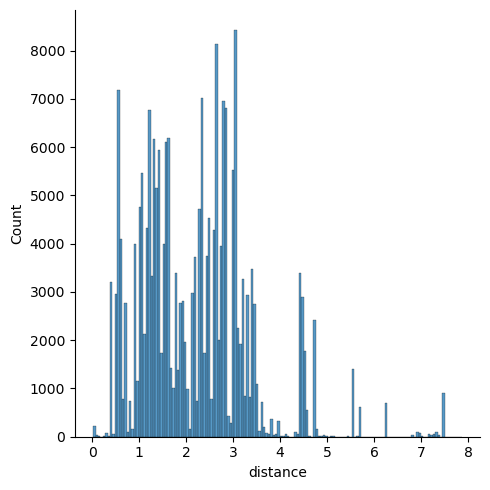

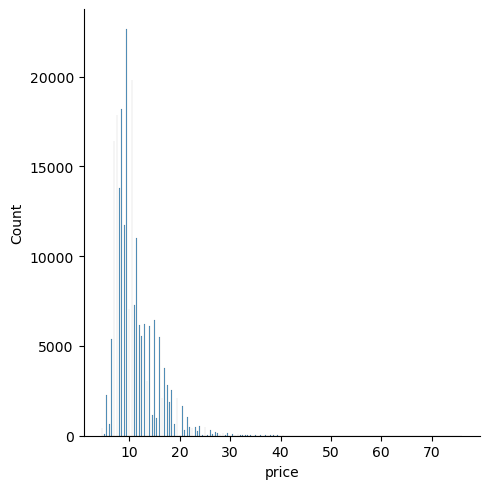

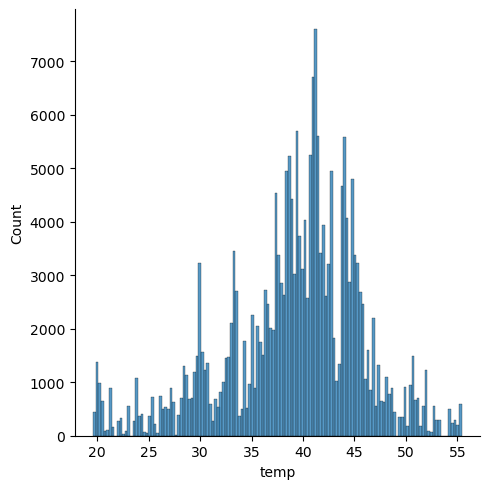

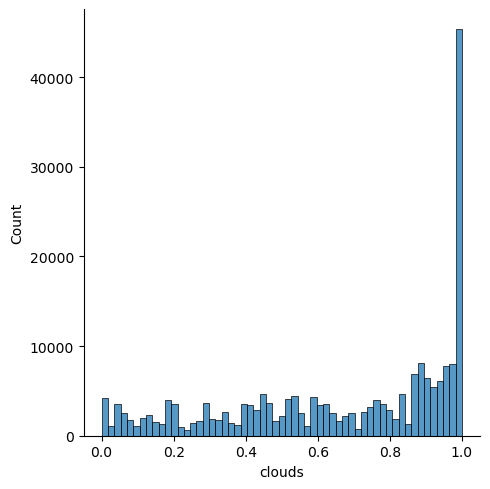

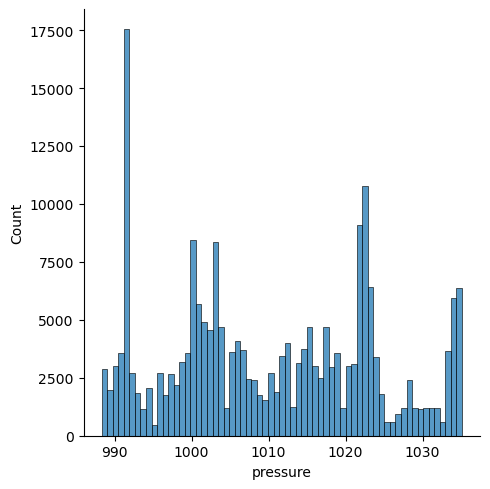

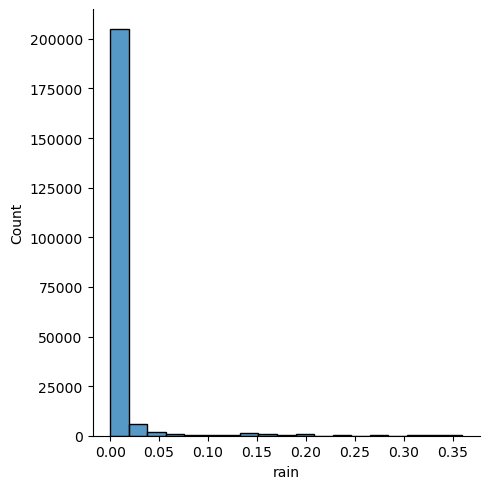

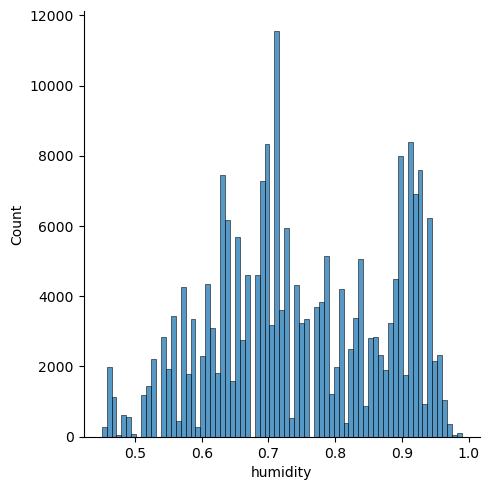

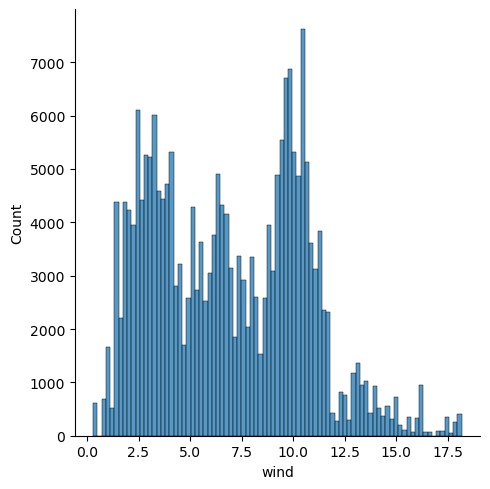

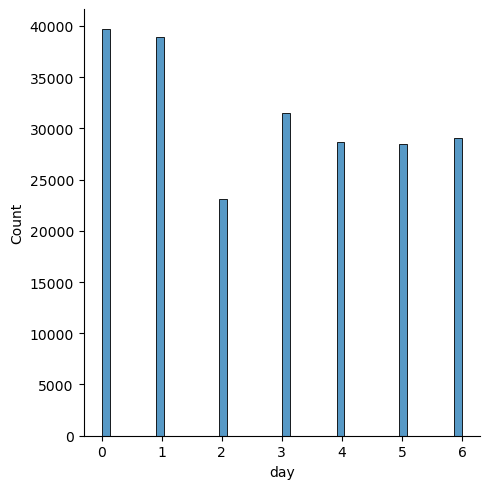

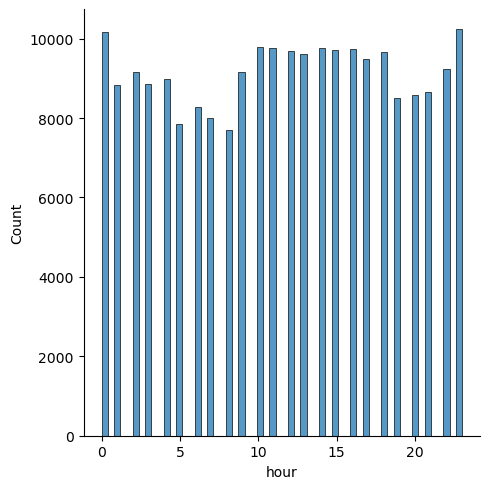

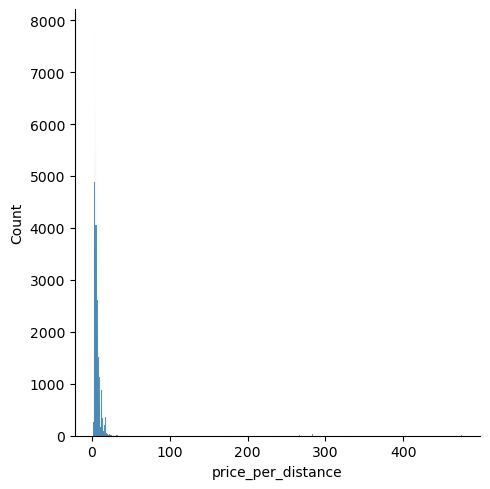

In [54]:
#looking at the histogram for each numerical column:
for c in numerical_df.columns:
    sns.displot(numerical_df[c])
    plt.show()
    


- From the histograms I can conclude that the column 'price' is a continuous variable that resembles a normal distribution, although slightly tilted to the left.
- For other columns:
    * 'distance' is a continuous variable, with a distribution that also resembles a normal distribution with a concentration around the value 1 but with other peaks around the value of 3 and 5.
    * 'price_per_distance' also resembles a normal distribution.
    * 'wind', 'humidity', 'rain', 'pressure', 'cloud' and 'temp' are all continuous variables, in most cases resembling the normal distribution, perhaps excluding 'pressure' and 'cloud'.
    * For these continuos variables I will not perform any transformation at this stage. Before modelling, however, these columns will need to be scaled using MinMaxScaler.
    * 'day' and 'hour' are discrete variables. Will take a closer look to each of these columns indiviually to see if it I can transform/combine the data to ease encoding. 

#### Discrete numerical variables

0    39660
1    38882
3    31541
6    29020
4    28662
5    28509
2    23133
Name: day, dtype: int64

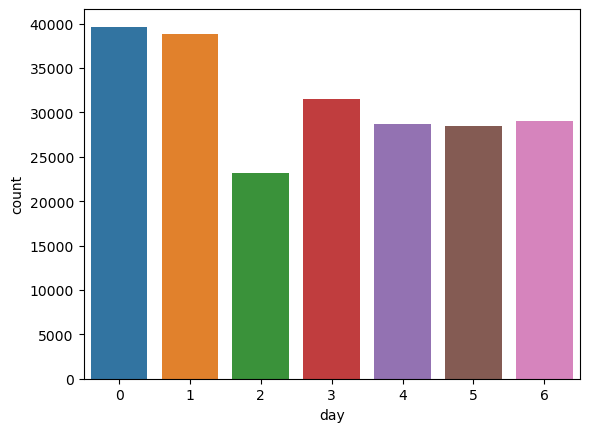

In [55]:
#day 
#0-6, where 0: Monday ... and 6: Sunday
display(numerical_df['day'].value_counts(dropna = False))
sns.countplot(x='day', data=numerical_df)
plt.show()

- Will not make any changes for now to the day column. For modelling it could make sense to combine categories into 'weekday' (0, 1, 2, 3, 4) and 'weekend' (5, 6).

23    10233
0     10160
10     9781
11     9775
14     9761
16     9733
15     9722
12     9685
18     9665
13     9624
17     9493
22     9239
9      9160
2      9148
4      8993
3      8854
1      8821
21     8656
20     8567
19     8502
6      8272
7      7996
5      7859
8      7708
Name: hour, dtype: int64

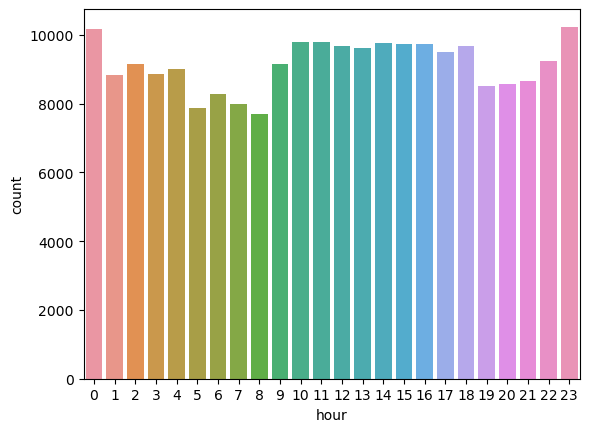

In [56]:
#hour
#0-24
display(numerical_df['hour'].value_counts(dropna = False))
sns.countplot(x='hour', data=numerical_df)
plt.show()

- The number of requested trips are distributed similarly throughout the day.
- Will not make changes to this column at this stage. For modelling it will probably make sense to combine categories in morning (5-11), afternoon (12-17), evening (18-22), night (23-4).

## Exploring the relationship between prices and 'day' and 'hour'

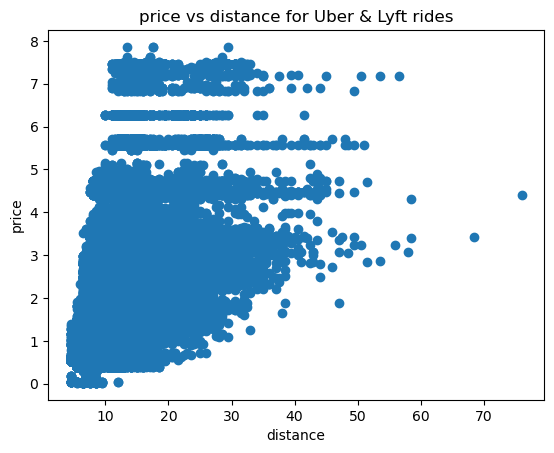

In [57]:
#first I want to see how distance and price are related to each other
plt.scatter(numerical_df.price, numerical_df.distance)
plt.title("price vs distance for Uber & Lyft rides")
plt.xlabel("distance")
plt.ylabel("price")
plt.show()

In [58]:
#calculating correlation
correlations_matrix = numerical_df.corr()
correlations_matrix

,distance,price,temp,clouds,pressure,rain,humidity,wind,day,hour,price_per_distance
distance,1.000000,0.524711,-0.000591,0.002265,0.000326,-0.004082,-0.004365,-0.001811,0.002073,0.002771,-0.328946
price,0.524711,1.000000,0.000123,0.000855,-0.002029,-0.004299,-0.003937,0.000260,-0.002055,0.003755,-0.023565
temp,-0.000591,0.000123,1.000000,0.437647,-0.374905,0.138127,0.371632,0.120369,-0.093241,0.218188,0.007004
clouds,0.002265,0.000855,0.437647,1.000000,-0.216931,0.212553,0.517552,0.130146,-0.163232,0.076889,0.000165
pressure,0.000326,-0.002029,-0.374905,-0.216931,1.000000,-0.071385,-0.144258,-0.575606,0.595675,-0.068683,-0.004195
rain,-0.004082,-0.004299,0.138127,0.212553,-0.071385,1.000000,0.216579,0.236081,-0.101729,-0.161305,0.000881
humidity,-0.004365,-0.003937,0.371632,0.517552,-0.144258,0.216579,1.000000,-0.200745,-0.073557,-0.247047,-0.000624
wind,-0.001811,0.000260,0.120369,0.130146,-0.575606,0.236081,-0.200745,1.000000,-0.392552,0.027368,-0.003332
day,0.002073,-0.002055,-0.093241,-0.163232,0.595675,-0.101729,-0.073557,-0.392552,1.000000,-0.003614,-0.001182
hour,0.002771,0.003755,0.218188,0.076889,-0.068683,-0.161305,-0.247047,0.027368,-0.003614,1.000000,0.002821


- As expected, 'price' and 'distance' are positively correlated, that is that rides with a longer distance tend to be associated with higher prices.
- In order to account for this relationship, I will use the column 'price_per_distance' to understand relationships between price and day/hour

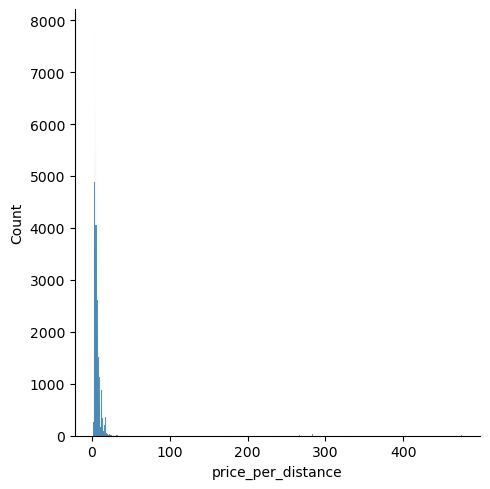

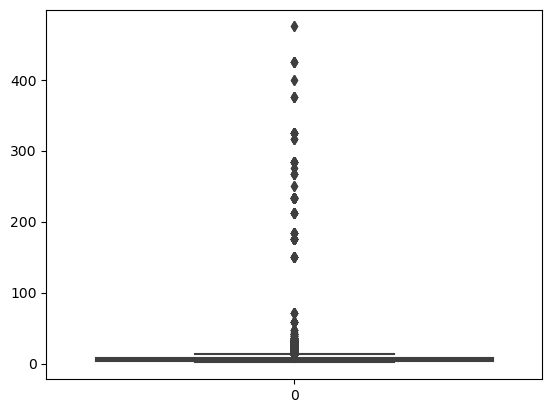

In [59]:
#looking at distribution of price_per_distance
sns.displot(numerical_df['price_per_distance'])
plt.show()
sns.boxplot(numerical_df['price_per_distance'])
plt.show()

In [60]:
#looking at average price_per_distance per day of the week
average_price_per_day = numerical_df.groupby('day')['price_per_distance'].mean()
average_price_per_day

day
0    6.590148
1    6.606216
2    6.631013
3    6.529516
4    6.622320
5    6.652757
6    6.509189
Name: price_per_distance, dtype: float64

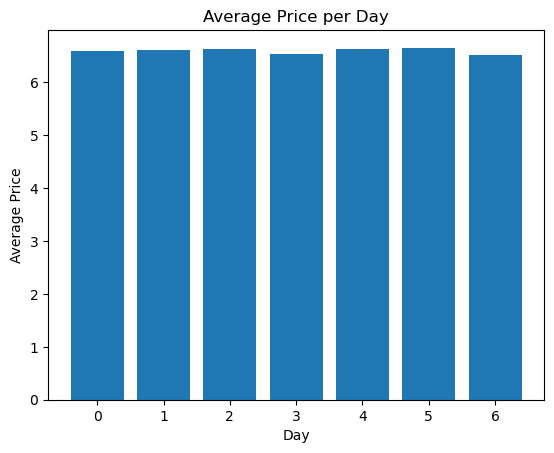

In [61]:
plt.bar(average_price_per_day.index, average_price_per_day.values)
plt.xlabel('Day')
plt.ylabel('Average Price')
plt.title('Average Price per Day')
plt.show()

<Axes: xlabel='day', ylabel='price_per_distance'>

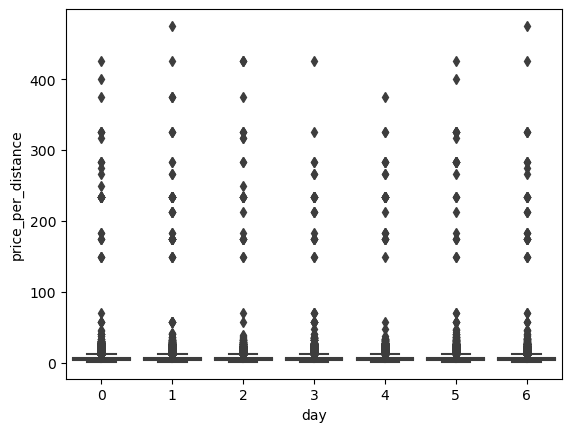

In [62]:
sns.boxplot(data=numerical_df, x="day", y="price_per_distance")

- There are no big differences in the overall sample for average prices per day. 
- At the margin, on average terms, Saturdays, Fridays and Tuesdays are more expensive while Sunday are cheaper.
- Maybe the average is not indicative of the day. As the boxplot shows, there are a number of outliers that are shaping the distribution. Will recalculate using the median instead.

In [63]:
#looking at median price_per_distance per day of the week
median_price_per_day = numerical_df.groupby('day')['price_per_distance'].median()
median_price_per_day

day
0    5.414013
1    5.384615
2    5.387931
3    5.414013
4    5.396254
5    5.448718
6    5.333333
Name: price_per_distance, dtype: float64

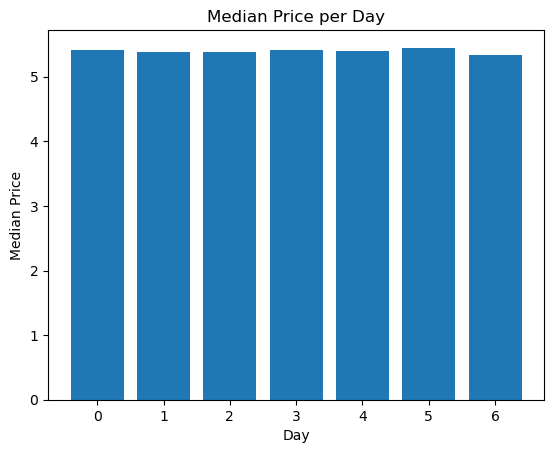

In [64]:
plt.bar(median_price_per_day.index, median_price_per_day.values)
plt.xlabel('Day')
plt.ylabel('Median Price')
plt.title('Median Price per Day')
plt.show()

- There are also not significant differences in the median prices_per_distance throughtout the week.
- The reason could be due to the fact that the large size of the data (law of large numbers).
- Will take a look at the relationship of price_per_distance and hour. 

In [65]:
#looking at average price_per_distance per hour of the day
average_price_per_hour = numerical_df.groupby('hour')['price_per_distance'].mean()
display(average_price_per_hour.mean())
average_price_per_hour

6.588927562053274

hour
0     6.712576
1     6.580242
2     6.504396
3     6.535389
4     6.533837
5     6.704792
6     6.696626
7     6.410050
8     6.469579
9     6.361660
10    6.529225
11    6.685127
12    6.517267
13    6.439907
14    6.669689
15    6.439732
16    6.770490
17    6.528391
18    6.918418
19    6.719009
20    6.523646
21    6.764705
22    6.525994
23    6.593515
Name: price_per_distance, dtype: float64

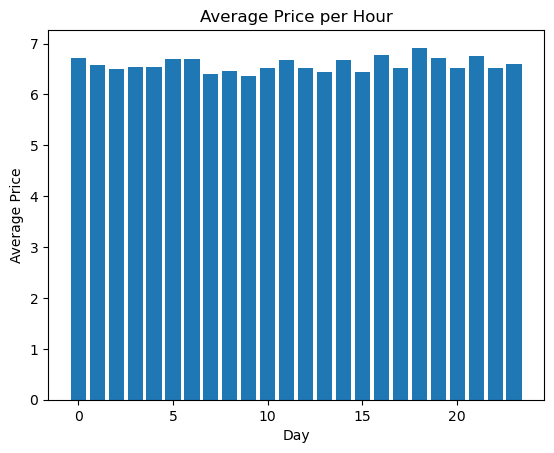

In [66]:
plt.bar(average_price_per_hour.index, average_price_per_hour.values)
plt.xlabel('Day')
plt.ylabel('Average Price')
plt.title('Average Price per Hour')
plt.show()

- Prices tend to be higher than average during early hours in the morning (5:00, 6:00), late morning (11:00), afternoon rush hours (18:00, 19:00) and late in the night (23:00, 00:00, 01:00).
- But differences are not very substantial, perhaps as there are outliers.
- Will look at the median instead.

In [67]:
#looking at median price_per_distance per hour of the day
median_price_per_hour = numerical_df.groupby('hour')['price_per_distance'].median()
display(median_price_per_hour.median())
median_price_per_hour

5.402771888942354

hour
0     5.416797
1     5.387931
2     5.362319
3     5.409357
4     5.448718
5     5.384615
6     5.401836
7     5.448718
8     5.352368
9     5.395683
10    5.357143
11    5.439331
12    5.409357
13    5.403708
14    5.357143
15    5.363985
16    5.454545
17    5.434783
18    5.357143
19    5.414013
20    5.371901
21    5.400000
22    5.409836
23    5.427632
Name: price_per_distance, dtype: float64

- I can observe similar differences when using the median, but these are not really significant.
- For undertanding the relationship between prices and rush hour, however, I will probably need to filter the data further per destination and day.
- For example, let's look at how prices are distributed only for the day of Friday.

In [68]:
#for example, looking only at Friday
friday_uber = numerical_df[numerical_df['day'] == 5]

In [69]:
friday_uber

,distance,price,temp,clouds,pressure,rain,humidity,wind,day,hour,price_per_distance
11,2.94,9.0,45.14,1.00,1022.35,0.0,0.91,6.26,5,6,3.061224
13,1.16,7.0,45.55,0.91,1021.86,0.0,0.91,6.49,5,7,6.034483
19,3.39,9.5,47.02,1.00,1022.47,0.0,0.89,3.32,5,13,2.802360
25,3.39,11.0,40.51,0.85,1026.94,0.0,0.83,4.95,5,0,3.244838
39,3.20,14.0,32.76,0.88,1020.17,0.0,0.79,4.21,5,9,4.375000
...,...,...,...,...,...,...,...,...,...,...,...
219391,2.50,16.0,47.90,0.89,1022.33,0.0,0.87,4.01,5,15,6.400000
219403,1.00,9.5,36.69,0.41,1023.64,0.0,0.76,2.51,5,23,9.500000
219404,1.00,13.0,36.69,0.41,1023.64,0.0,0.76,2.51,5,23,13.000000
219405,1.00,9.5,36.69,0.41,1023.64,0.0,0.76,2.51,5,23,9.500000


In [70]:
average_price_per_hour = friday_uber.groupby('hour')['price_per_distance'].mean()
display(average_price_per_hour.mean())
average_price_per_hour

6.6561693353133355

hour
0     7.229426
1     6.403149
2     6.801607
3     6.423716
4     6.844270
5     6.596159
6     6.537657
7     6.680691
8     6.532342
9     6.200341
10    6.303124
11    6.450644
12    6.544207
13    6.566734
14    6.705659
15    6.084468
16    6.712470
17    6.487177
18    8.402690
19    6.772200
20    6.461771
21    6.722494
22    6.690009
23    6.595058
Name: price_per_distance, dtype: float64

- For example looking only at trips on Friday, there is already more heterogenity in the prices, with the average price at rush hour around 18:00 rising 27% compared to the daily average.
- In the following section I will dig deeper into this by formulating some hypothesis of when prices should be affected by demand based on the destination/source and hour/day of the day/week.
- For this I will use the uber_df as it contains both categorical and numerical columns.

### Hypothesis 1: average prices tend to be higher during rush commuting hours during the week days

#### Hypothesis 1.1.: Mornings 7am-10am, Monday-Thursday
- I want to test the hypothesis that average prices per mile on morning rush hours that have a 'business' destination tend to be higher than the average prices per mile in the overall dataset.
- Week day morning rush hours are defined between 7:00am to 9:59am from Monday to Thursday.
- For this, first I need compute the average of prices for the whole dataset, that would serve as the reference to set my null hypothesis. 

In [71]:
#First computing the average price_per_destination for the whole dataset
#This will serve as the reference when setting my null hypothesis
average_price_uber_df = uber_df['price_per_distance'].mean()
print("the average price per mile from Monday to Sunday is ", average_price_uber_df)

the average price per mile from Monday to Sunday is  6.590217759030618


##### Setting null and alternative hypothesis
- **Ho** = price/mile during morning rush hours to business districts <= 6.59 (average price/mile during whole period)
- **H1** = price/mile during morning rush hours to business districts > 6.59 (average price/mile during whole period)

In [72]:
#first I will select the data for morning rushing hour, defined as Monday-Thursday, 7:00-9:59, with a business district destination
uber_mon_thu = uber_df[uber_df['day'].isin([0, 1, 2, 3])]
morning_rush = uber_mon_thu[uber_mon_thu['hour'].isin([7, 8, 9])]
morning_rush_business = morning_rush[morning_rush['destination'] == 'business']
morning_rush_business

,distance,destination,source,price,name,temp,clouds,pressure,rain,humidity,wind,datetime,day,hour,price_per_distance
20,3.39,business,education,17.0,UberXL,37.70,0.63,1001.84,0.000,0.69,9.95,2018-11-29 08:08:05.039000064,3,8,5.014749
31,3.07,business,other,18.5,UberXL,45.46,0.92,1001.11,0.000,0.94,2.58,2018-12-03 08:02:56.270999808,0,8,6.026059
33,3.07,business,other,8.5,UberPool,27.23,0.80,1006.12,0.000,0.54,17.08,2018-12-18 09:40:08.048000000,1,9,2.768730
144,1.03,business,commercial,8.5,WAV,45.53,0.88,1000.09,0.000,0.94,1.38,2018-12-03 09:38:01.891000064,0,9,8.252427
166,1.58,business,business,6.5,UberPool,20.15,0.39,1030.70,0.000,0.64,3.93,2018-12-13 09:35:08.968000000,3,9,4.113924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219353,0.49,business,commercial,7.0,WAV,38.40,1.00,1005.19,0.000,0.91,10.80,2018-12-17 07:15:07.046000128,0,7,14.285714
219354,0.49,business,commercial,6.5,UberPool,38.40,1.00,1005.19,0.000,0.91,10.80,2018-12-17 07:15:07.046000128,0,7,13.265306
219355,3.22,business,education,10.0,UberPool,38.12,1.00,1005.21,0.003,0.92,10.60,2018-12-17 07:15:07.046000128,0,7,3.105590
219381,3.07,business,other,8.5,UberPool,37.63,0.63,1001.84,0.000,0.69,9.97,2018-11-29 08:18:01.892000000,3,8,2.768730


In [73]:
#now conducting hypothesis testing:
stat, pval = ttest_1samp(morning_rush_business['price_per_distance'], 6.59)
print('stat is  ', stat)
print('pvalue for the one-tailed test is ', pval/2)

stat is   11.026198845994966
pvalue for the one-tailed test is  4.17282654671724e-28


- Based on the p-value, we can reject the null hypothesis that prices are equal to the average price per mile in the whole dataset, with 99% of confidence.
- The stat also allows to reject the null hypothesis that prices are lower. We can infer that prices should be higher.
- Let's confirm it computing the average price in the morning_rush_business df.

In [74]:
average_morning_rush_business = morning_rush_business['price_per_distance'].mean()
difference = round((average_morning_rush_business/average_price_uber_df - 1 )*100,1)
print("the average price/mile during morning rush hours is ", average_morning_rush_business)
print("the average price/mile during morning rush hours tends to be ", difference, "% higher relative to the average price/mile for the whole dataset")

the average price/mile during morning rush hours is  7.62069155976181
the average price/mile during morning rush hours tends to be  15.6 % higher relative to the average price/mile for the whole dataset


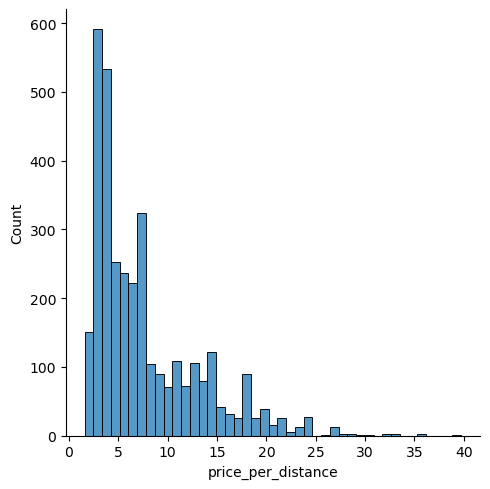

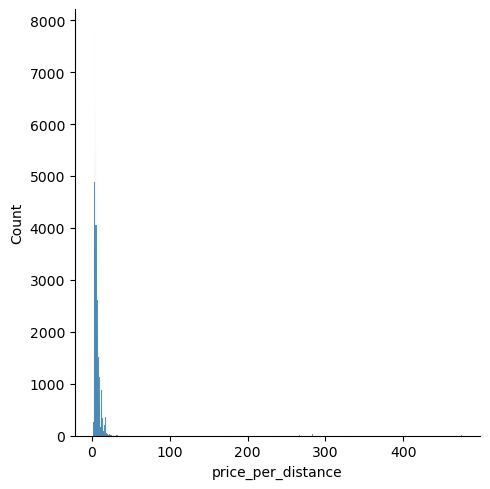

In [75]:
#comparing the distribution of price_per_distance between the whole dataset and the morning_rush hours
sns.displot(morning_rush_business['price_per_distance'])
plt.show()

sns.displot(uber_df['price_per_distance'])
plt.show()

#### Hypothesis 1.2: Afternoons 4pm-7pm, Monday-Thursday
- As a second step, I will repeat the same procedure as before but will restrict for trips during rush afternoon hours (defined from 16:00 to 18:59) that have a source location corresponding to business district.
- Will test a hypothesis that the average price during this rush afternoon hours is higher than the average price for the whole dataset.

##### Setting null and alternative hypothesis
- **Ho** = price/mile during afternoon rush hours from business districts <= 6.59 (average price/mile during whole period)
- **H1** = price/mile during afternoon rush hours from business districts > 6.59 (average price/mile during whole period)

In [76]:
#first I will select the data for afternoon rushing hour, defined as Monday-Thursday, 16:00-18:59, with a business district source
afternoon_rush = uber_mon_thu[uber_mon_thu['hour'].isin([16, 17, 18])]
afternoon_rush_business = afternoon_rush[afternoon_rush['source'] == 'business']
afternoon_rush_business

,distance,destination,source,price,name,temp,clouds,pressure,rain,humidity,wind,datetime,day,hour,price_per_distance
29,2.49,entertaiment,business,11.0,UberPool,53.310000,0.850000,999.290000,0.000000,0.540000,9.880000,2018-12-03 18:02:56.100000000,0,18,4.417671
46,3.05,other,business,10.5,UberX,41.236667,0.650000,991.573333,0.000000,0.623333,10.060000,2018-11-28 16:53:07.918999808,2,16,3.442623
48,3.05,other,business,17.5,UberXL,30.830000,0.000000,1012.320000,0.000000,0.460000,13.090000,2018-12-18 18:00:08.342000128,1,18,5.737705
117,2.58,entertaiment,business,8.5,UberPool,41.473333,0.953333,991.526667,0.000967,0.626667,9.860000,2018-11-28 18:16:27.403000064,2,18,3.294574
183,3.30,education,business,17.5,UberXL,31.590000,0.530000,1033.430000,0.000000,0.550000,2.090000,2018-12-13 17:50:08.244000000,3,17,5.303030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219132,0.63,business,business,7.0,WAV,38.480000,1.000000,1001.840000,0.000000,0.850000,6.350000,2018-12-17 16:50:11.184000000,0,16,11.111111
219329,3.05,other,business,17.0,UberXL,41.423333,0.896667,991.553333,0.000667,0.633333,9.493333,2018-11-28 17:11:26.387000064,2,17,5.573770
219335,1.30,entertaiment,business,9.5,WAV,41.140000,0.930000,1000.160000,0.000000,0.780000,7.590000,2018-12-17 18:00:13.216999936,0,18,7.307692
219336,1.30,entertaiment,business,9.0,UberPool,41.140000,0.930000,1000.160000,0.000000,0.780000,7.590000,2018-12-17 18:00:13.216999936,0,18,6.923077


In [77]:
#now conducting hypothesis testing:
stat, pval = ttest_1samp(afternoon_rush_business['price_per_distance'], 6.59)
print('stat is  ', stat)
print('pvalue for the one-tailed test is ', pval/2)

stat is   4.282532806143414
pvalue for the one-tailed test is  9.428553507529194e-06


- Based on the p-value, we can also reject the null hypothesis that prices are equal to the average price per mile for the whole dataset, with 99% of confidence.
- The stat also allows to reject the null hypothesis that prices are lower. We can infer that prices should be higher.
- Let's confirm it computing the average price in the afternoon_rush_business df.

In [78]:
average_afternoon_rush_business = afternoon_rush_business['price_per_distance'].mean()
difference = round((average_afternoon_rush_business/average_price_uber_df - 1 )*100,1)
print("the average price/mile during afternoon rush hours is ", average_afternoon_rush_business)
print("the average price/mile during afternoon rush hours tends to be ", difference, "% higher relative to the average price/mile during Monday-Thursday for all destinations")

the average price/mile during afternoon rush hours is  7.048461337546156
the average price/mile during afternoon rush hours tends to be  7.0 % higher relative to the average price/mile during Monday-Thursday for all destinations


### Hypothesis 2: average prices tend to be higher during rush leisure hours during Friday & Saturday

#### Hypothesis 2.1: Friday from 6pm until 9pm with an "entertaiment" or "commercial" destination 
- For this second set of hypothesis I want to test whether average prices tend to be higher during Friday & Saturday between the hours 18:00-23:59 that have a destination to an entertaiment or commercial district.
- I will compare it with the average price/mile during the whole period, used in the hypothesis 1, constructing a new hypothesis.


##### Setting null and alternative hypothesis
- **Ho** = price/mile during entertaiment rush hours on Friday to entertaiment/commercial <= 6.59 (average price/mile during the whole period)
- **H1** = price/mile during entertaiment rush hours on Friday to entertaiment/commercial > 6.63 (average price/mile during the whole period)

In [80]:
#now conducting hypothesis testing:
stat, pval = ttest_1samp(friday_rush_ent.price_per_distance, 6.59)
print('stat is  ', stat)
print('pvalue for the one-tailed test is ', pval/2)

stat is   2.0630219216083923
pvalue for the one-tailed test is  0.019590969797901606


- Based on the p-value, we can also reject the null hypothesis that prices are equal to the average price in the whole dataset, with 98% of confidence.
- The stat also allows to reject the null hypothesis that prices are lower. We can infer that prices should be higher.
- Let's confirm it computing the average price in the friday_rush_ent df.

In [81]:
average_friday_rush_ent = friday_rush_ent['price_per_distance'].mean()
difference = round((average_friday_rush_ent/average_price_uber_df - 1 )*100,1)
print("the average price/mile during Friday rush hours is ", average_friday_rush_ent)
print("the average price/mile during Friday rush hours tends to be ", difference, "% higher relative to the average price/mile in the whole dataset")

the average price/mile during Friday rush hours is  6.975947330250224
the average price/mile during Friday rush hours tends to be  5.9 % higher relative to the average price/mile in the whole dataset


#### Hypothesis 2.2: Saturday from 6pm until midnight with an "entertaiment" or "commercial" destination 
- I will repeat the same hypothesis used in 2.1 but now selecting trips on Saturday rush hours (18:00 - 23:59) with a destination in a entertaiment or commercial district.
- Will test whether this average price is lower or equal than the average price for the whole dataset.

##### Setting null and alternative hypothesis
- **Ho** = price/mile during entertaiment rush hours on Saturday to entertaiment/commercial districts <= 6.59 (average price/mile during the whole period)
- **H1** = price/mile during entertaiment rush hours on Friday to entertaiment/commercial > 6.63 (average price/mile during the whole period)

In [82]:
saturday = uber_df[uber_df['day'] == 5]
saturday_rush = saturday[saturday['hour'].isin([18, 19, 20, 21, 22, 23])]
saturday_rush_ent = saturday_rush[saturday_rush['destination'].isin(['entertaiment', 'commercial'])]
saturday_rush_ent

,distance,destination,source,price,name,temp,clouds,pressure,rain,humidity,wind,datetime,day,hour,price_per_distance
171,1.21,commercial,business,8.5,UberX,41.37,0.64,1023.18,0.0,0.62,1.78,2018-12-01 20:02:59.088999936,5,20,7.024793
279,2.09,entertaiment,commercial,9.5,WAV,40.94,0.64,1023.18,0.0,0.63,1.77,2018-12-01 20:18:03.480999936,5,20,4.545455
345,1.89,entertaiment,education,16.0,UberXL,37.79,0.55,1023.52,0.0,0.72,2.40,2018-12-01 22:37:57.841000192,5,22,8.465608
367,2.30,entertaiment,commercial,11.5,UberX,51.87,0.90,1021.30,0.0,0.73,5.60,2018-12-15 18:35:10.405999872,5,18,5.000000
368,3.19,commercial,entertaiment,21.5,UberXL,42.79,0.75,1022.80,0.0,0.57,1.72,2018-12-01 19:18:03.312999936,5,19,6.739812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218793,0.56,commercial,business,7.0,UberX,42.45,0.45,1022.63,0.0,0.57,0.93,2018-12-01 18:03:03.714999808,5,18,12.500000
219403,1.00,commercial,entertaiment,9.5,WAV,36.69,0.41,1023.64,0.0,0.76,2.51,2018-12-01 23:53:05.533999872,5,23,9.500000
219404,1.00,commercial,entertaiment,13.0,UberXL,36.69,0.41,1023.64,0.0,0.76,2.51,2018-12-01 23:53:05.533999872,5,23,13.000000
219405,1.00,commercial,entertaiment,9.5,UberX,36.69,0.41,1023.64,0.0,0.76,2.51,2018-12-01 23:53:05.533999872,5,23,9.500000


In [83]:
#now conducting hypothesis testing:
stat, pval = ttest_1samp(saturday_rush_ent.price_per_distance, 6.59)
print('stat is  ', stat)
print('pvalue for the one-tailed test is ', pval/2)

stat is   2.489991750448225
pvalue for the one-tailed test is  0.006410175641591038


- Based on the p-value, we can also reject the null hypothesis that prices are equal to the average price in the whole dataset, with 99% of confidence.
- The stat also allows to reject the null hypothesis that prices are lower. We can infer that prices should be higher.
- Let's confirm it computing the average price in the saturday_rush_ent df.

In [84]:
average_saturday_rush_ent = saturday_rush_ent['price_per_distance'].mean()
difference = round((average_saturday_rush_ent/average_price_uber_df - 1 )*100,1)
print("the average price/mile during Saturday rush hours is ", average_saturday_rush_ent)
print("the average price/mile during Saturday rush hours tends to be ", difference, "% higher relative to the average price/mile in the whole dataset")

the average price/mile during Saturday rush hours is  6.89397448071176
the average price/mile during Saturday rush hours tends to be  4.6 % higher relative to the average price/mile in the whole dataset


### Hypothesis 3: average prices tend to be lower on Sunday

- For this hypothesis i want to test whether average prices on Sunday tend to be lower when compared to the whole dataset.
- Will use the same average price/mile as reference to construct the null hypothesis

##### Setting null and alternative hypothesis
- **Ho** = price/mile on Sunday >= 6.59 (average price/mile during the whole period)
- **H1** = price/mile during Sunday < 6.59 (average price/mile during the whole period)

In [85]:
sunday = uber_df[uber_df['day'] == 6]
sunday

,distance,destination,source,price,name,temp,clouds,pressure,rain,humidity,wind,datetime,day,hour,price_per_distance
2,1.11,entertaiment,commercial,7.5,WAV,42.36,1.00,1012.15,0.2088,0.77,11.46,2018-12-16 23:55:11.430000128,6,23,6.756757
5,2.48,business,entertaiment,15.0,UberXL,40.62,0.55,1024.64,0.0000,0.71,6.55,2018-12-16 03:40:13.778000128,6,3,6.048387
9,2.94,other,business,15.0,UberXL,39.24,1.00,1019.54,0.0295,0.86,4.06,2018-12-02 08:32:56.844000000,6,8,5.102041
18,3.39,business,education,9.5,WAV,51.34,1.00,1003.11,0.0000,0.92,3.60,2018-12-02 20:58:00.319000064,6,20,2.802360
26,2.49,entertaiment,business,12.0,UberX,39.54,0.27,1022.35,0.0000,0.73,8.02,2018-12-16 09:35:12.417999872,6,9,4.819277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219366,7.36,commercial,entertaiment,15.5,UberPool,36.65,0.91,1022.66,0.0000,0.84,1.07,2018-12-02 04:58:05.793999872,6,4,2.105978
219367,7.36,commercial,entertaiment,17.0,WAV,36.65,0.91,1022.66,0.0000,0.84,1.07,2018-12-02 04:58:05.793999872,6,4,2.309783
219400,1.61,commercial,entertaiment,14.0,UberPool,37.01,0.83,1021.65,0.0000,0.85,1.60,2018-12-02 05:28:04.148999936,6,5,8.695652
219401,1.61,commercial,entertaiment,15.0,UberX,37.01,0.83,1021.65,0.0000,0.85,1.60,2018-12-02 05:28:04.148999936,6,5,9.316770


In [86]:
#now conducting hypothesis testing:
stat, pval = ttest_1samp(sunday.price_per_distance, 6.59)
print('stat is  ', stat)
print('pvalue for the one-tailed test is ', pval/2)

stat is   -1.5546517910561053
pvalue for the one-tailed test is  0.060019963572154486


- Based on the p-value, we can also reject the null hypothesis that prices are equal to the average price in the whole dataset, but only with 94% of confidence.
- The stat also allows to reject the null hypothesis that prices are higher. We can infer that prices should be somewhat lower.
- Let's confirm it computing the average price in the sunday df.

In [87]:
average_sunday = sunday['price_per_distance'].mean()
difference = round((average_sunday/average_price_uber_df - 1 )*100,1)
print("the average price/mile during Sunday is ", average_sunday)
print("the average price/mile during Sunday tends to be ", difference, "% lower relative to the average price/mile in the whole dataset")

the average price/mile during Sunday is  6.509189230103165
the average price/mile during Sunday tends to be  -1.2 % lower relative to the average price/mile in the whole dataset


## Exploring the relationship between prices and the weather columns

In [88]:
uber_df

,distance,destination,source,price,name,temp,clouds,pressure,rain,humidity,wind,datetime,day,hour,price_per_distance
0,1.11,entertaiment,commercial,12.0,UberXL,38.65,0.96,1017.23,0.0000,0.65,3.13,2018-11-30 22:13:01.178999808,4,22,10.810811
1,1.11,entertaiment,commercial,7.5,UberX,32.75,0.51,1033.75,0.0000,0.57,1.90,2018-12-13 19:15:03.935000064,3,19,6.756757
2,1.11,entertaiment,commercial,7.5,WAV,42.36,1.00,1012.15,0.2088,0.77,11.46,2018-12-16 23:55:11.430000128,6,23,6.756757
3,1.11,entertaiment,commercial,5.5,UberPool,42.48,0.58,1007.66,0.0000,0.54,10.84,2018-11-29 19:18:00.802000128,3,19,4.954955
4,2.48,business,entertaiment,8.5,WAV,40.00,0.82,999.92,0.0000,0.74,9.23,2018-12-17 20:40:09.832000000,0,20,3.427419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219402,1.61,commercial,entertaiment,15.0,WAV,37.01,0.83,1021.65,0.0000,0.85,1.60,2018-12-02 05:28:04.148999936,6,5,9.316770
219403,1.00,commercial,entertaiment,9.5,WAV,36.69,0.41,1023.64,0.0000,0.76,2.51,2018-12-01 23:53:05.533999872,5,23,9.500000
219404,1.00,commercial,entertaiment,13.0,UberXL,36.69,0.41,1023.64,0.0000,0.76,2.51,2018-12-01 23:53:05.533999872,5,23,13.000000
219405,1.00,commercial,entertaiment,9.5,UberX,36.69,0.41,1023.64,0.0000,0.76,2.51,2018-12-01 23:53:05.533999872,5,23,9.500000


#### Looking at the impact of rain

In [89]:
#select only observations when rain > 0
uber_rain = uber_df[uber_df['rain']>0]
uber_rain

,distance,destination,source,price,name,temp,clouds,pressure,rain,humidity,wind,datetime,day,hour,price_per_distance
2,1.11,entertaiment,commercial,7.5,WAV,42.360,1.000,1012.150,0.20880,0.770,11.460,2018-12-16 23:55:11.430000128,6,23,6.756757
9,2.94,other,business,15.0,UberXL,39.240,1.000,1019.540,0.02950,0.860,4.060,2018-12-02 08:32:56.844000000,6,8,5.102041
17,2.67,entertaiment,commercial,9.5,UberX,44.105,0.995,1002.885,0.12215,0.895,12.665,2018-11-27 02:42:21.956000000,1,2,3.558052
34,1.57,commercial,entertaiment,8.0,WAV,42.785,0.905,1014.700,0.00300,0.910,2.995,2018-11-26 14:50:09.624999936,0,14,5.095541
36,1.57,commercial,entertaiment,8.0,UberPool,37.940,1.000,1020.060,0.02010,0.860,1.960,2018-12-02 07:03:03.117000192,6,7,5.095541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219395,0.91,entertaiment,commercial,7.0,UberX,38.454,0.614,997.475,0.00020,0.711,10.238,2018-11-29 01:47:08.122999808,3,1,7.692308
219396,1.79,entertaiment,commercial,14.0,UberXL,38.484,0.613,997.468,0.00020,0.709,10.257,2018-11-29 01:47:08.122999808,3,1,7.821229
219397,1.79,entertaiment,commercial,8.5,UberPool,38.484,0.613,997.468,0.00020,0.709,10.257,2018-11-29 01:47:08.122999808,3,1,4.748603
219398,0.91,entertaiment,commercial,7.0,WAV,38.454,0.614,997.475,0.00020,0.711,10.238,2018-11-29 01:47:08.122999808,3,1,7.692308


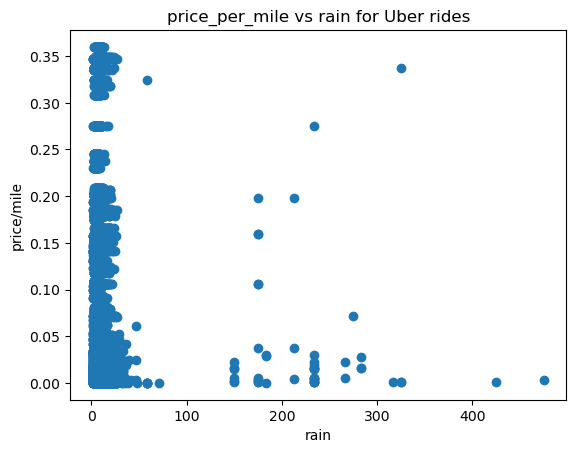

In [90]:
#looking at scatter plot between rain and price_per_distance
plt.scatter(uber_rain.price_per_distance, uber_rain.rain)
plt.title("price_per_mile vs rain for Uber rides")
plt.xlabel("rain")
plt.ylabel("price/mile")
plt.show()

In [91]:
#calculating correlation
correlations_matrix = uber_rain.corr()
correlations_matrix

/var/folders/ws/0xbhg9d95hd9g5nvrfz8pwk40000gn/T/ipykernel_53465/2250547733.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_matrix = uber_rain.corr()


,distance,price,temp,clouds,pressure,rain,humidity,wind,day,hour,price_per_distance
distance,1.000000,0.520654,0.011308,0.025705,-0.013586,-0.010993,0.008208,-0.014812,-0.007657,0.036510,-0.324036
price,0.520654,1.000000,0.001496,0.012102,-0.010632,-0.009002,0.000988,-0.002202,-0.010018,0.010971,-0.027698
temp,0.011308,0.001496,1.000000,0.197398,-0.154477,0.227769,0.262326,0.010769,-0.132501,0.286757,0.003939
clouds,0.025705,0.012102,0.197398,1.000000,0.196212,0.219599,0.649886,-0.048491,0.001921,0.062052,-0.003009
pressure,-0.013586,-0.010632,-0.154477,0.196212,1.000000,0.069091,0.215793,-0.434181,0.559451,0.120127,0.001430
rain,-0.010993,-0.009002,0.227769,0.219599,0.069091,1.000000,0.211515,0.349863,-0.155361,-0.305498,0.000627
humidity,0.008208,0.000988,0.262326,0.649886,0.215793,0.211515,1.000000,-0.137268,-0.091769,-0.229298,-0.006165
wind,-0.014812,-0.002202,0.010769,-0.048491,-0.434181,0.349863,-0.137268,1.000000,-0.419936,-0.275190,0.008307
day,-0.007657,-0.010018,-0.132501,0.001921,0.559451,-0.155361,-0.091769,-0.419936,1.000000,0.267452,0.001228
hour,0.036510,0.010971,0.286757,0.062052,0.120127,-0.305498,-0.229298,-0.275190,0.267452,1.000000,-0.010858


- In the overall database when there is any rain (>0), there is not really a positive correlation between the level of rain and the price/mile.
- Will conduct hypothesis to test whether the average price/mile when any rain is greater than the average price/mile in the overall dataset.

- **Ho** = price/mile on rides with any rain >= 6.59 (average price/mile during the whole period)
- **H1** = price/mile on rides with any rain < 6.59 (average price/mile during the whole period)

In [92]:
#now conducting hypothesis testing:
stat, pval = ttest_1samp(uber_rain.price_per_distance, 6.59)
print('stat is  ', stat)
print('pvalue for the one-tailed test is ', pval/2)

stat is   0.5669653688195713
pvalue for the one-tailed test is  0.28537054099878556


- It is not possible to reject the null hypothesis from the p-value.
- I will look now at the average price when rain.

In [93]:
average_rain = uber_rain['price_per_distance'].mean()
difference = round((average_rain/average_price_uber_df - 1 )*100,1)
print("the average price/mile during rainny rides is", average_rain)
print("the average price/mile during rainny rides tends to be ", difference, "% higher relative to the average price/mile in the whole dataset")

the average price/mile during rainny rides is 6.617123056537731
the average price/mile during rainny rides tends to be  0.4 % higher relative to the average price/mile in the whole dataset


- Indeed, the average price of rain is only marginally above the overall average.
- However, the datset was collected in the last week of November, where probably the weather was bad in general and perhaps did not significantly alter the prices.
- I will instead focused on rows where rain was above the Q95 and Q99 of the rain distribution.

In [127]:
#rainny rides: rain > Q95
rain_q95 = uber_rain['rain'].quantile(0.95)
display(rain_q95)
uber_rain_q95 = uber_df[uber_df['rain']>rain_q95]
uber_rain_q95

0.19365

,distance,destination,source,price,name,temp,clouds,pressure,rain,humidity,wind,datetime,day,hour,price_per_distance
2,1.11,entertaiment,commercial,7.5,WAV,42.3600,1.0000,1012.1500,0.208800,0.7700,11.4600,2018-12-16 23:55:11.430000128,6,23,6.756757
512,2.19,commercial,entertaiment,8.5,UberX,44.1425,0.9925,1005.1475,0.308725,0.9000,11.7250,2018-11-27 01:24:22.101000192,1,1,3.881279
517,2.50,entertaiment,business,15.0,UberXL,44.6925,0.9925,1005.0825,0.337075,0.8850,11.5725,2018-11-27 01:48:22.279000064,1,1,6.000000
887,2.62,education,entertaiment,10.5,WAV,44.0100,0.9925,1005.0750,0.318425,0.9025,11.5300,2018-11-27 01:09:21.858000128,1,1,4.007634
890,2.62,education,entertaiment,10.5,UberX,44.0100,0.9925,1005.0750,0.318425,0.9025,11.5300,2018-11-27 01:15:22.444000000,1,1,4.007634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219083,2.27,education,entertaiment,15.0,UberXL,44.1425,0.9925,1005.1475,0.308725,0.9000,11.7250,2018-11-27 01:39:22.187000064,1,1,6.607930
219084,2.27,education,entertaiment,9.5,UberX,44.1425,0.9925,1005.1475,0.308725,0.9000,11.7250,2018-11-27 01:39:22.187000064,1,1,4.185022
219281,1.84,business,business,8.0,UberX,44.6925,0.9925,1005.0825,0.337075,0.8850,11.5725,2018-11-27 01:15:22.150000128,1,1,4.347826
219282,1.84,business,business,12.5,UberXL,44.6925,0.9925,1005.0825,0.337075,0.8850,11.5725,2018-11-27 01:15:22.150000128,1,1,6.793478


- **Ho** = price/mile on rides with rain above Q95 >= 6.59 (average price/mile during the whole period)
- **H1** = price/mile on rides with rain above Q95 < 6.59 (average price/mile during the whole period)

In [95]:
#now conducting hypothesis testing:
stat, pval = ttest_1samp(uber_rain_q95.price_per_distance, 6.59)
print('stat is  ', stat)
print('pvalue for the one-tailed test is ', pval/2) #can reject null hypothesis but only at 90% confidence level

stat is   1.2969649409315898
pvalue for the one-tailed test is  0.09740132600366819


In [96]:
average_rain = uber_rain_q95['price_per_distance'].mean()
difference = round((average_rain/average_price_uber_df - 1 )*100,1)
print("the average price/mile during rainny rides ", average_rain)
print("the average price/mile during rainny rides tends to be ", difference, "% higher relative to the average price/mile in the whole dataset")

the average price/mile during rainny rides  6.934389297442616
the average price/mile during rainny rides tends to be  5.2 % higher relative to the average price/mile in the whole dataset


In [128]:
#Really rainny rides (rain > Q.99)
rain_q99 = uber_rain['rain'].quantile(0.99)
display(rain_q99)
uber_rain_q99 = uber_df[uber_df['rain']>rain_q99]
uber_rain_q99

0.335275

,distance,destination,source,price,name,temp,clouds,pressure,rain,humidity,wind,datetime,day,hour,price_per_distance
517,2.50,entertaiment,business,15.0,UberXL,44.6925,0.9925,1005.0825,0.337075,0.8850,11.5725,2018-11-27 01:48:22.279000064,1,1,6.000000
1669,0.39,business,business,9.5,UberXL,44.7175,0.9925,1005.0925,0.347275,0.8800,11.5700,2018-11-27 01:39:23.801000192,1,1,24.358974
1719,1.16,entertaiment,commercial,7.5,UberX,44.1525,0.9900,1005.1775,0.349275,0.9000,11.7975,2018-11-27 01:39:21.954999808,1,1,6.465517
2620,1.16,entertaiment,commercial,5.5,UberPool,44.1750,0.9900,1005.1200,0.359825,0.9025,11.5800,2018-11-27 01:36:22.532999936,1,1,4.741379
2672,4.48,other,business,34.0,UberXL,44.7175,0.9925,1005.0925,0.347275,0.8800,11.5700,2018-11-27 01:03:22.140000000,1,1,7.589286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217562,1.46,entertaiment,commercial,9.5,UberX,44.1750,0.9900,1005.1200,0.359825,0.9025,11.5800,2018-11-27 01:54:22.019000064,1,1,6.506849
217563,1.46,entertaiment,commercial,9.5,WAV,44.1750,0.9900,1005.1200,0.359825,0.9025,11.5800,2018-11-27 01:54:22.019000064,1,1,6.506849
219281,1.84,business,business,8.0,UberX,44.6925,0.9925,1005.0825,0.337075,0.8850,11.5725,2018-11-27 01:15:22.150000128,1,1,4.347826
219282,1.84,business,business,12.5,UberXL,44.6925,0.9925,1005.0825,0.337075,0.8850,11.5725,2018-11-27 01:15:22.150000128,1,1,6.793478


- **Ho** = price/mile on rides with rain above Q99 >= 6.59 (average price/mile during the whole period)
- **H1** = price/mile on rides with rain above Q99 < 6.59 (average price/mile during the whole period)

In [98]:
#now conducting hypothesis testing:
stat, pval = ttest_1samp(uber_rain_q99.price_per_distance, 6.59)
print('stat is  ', stat)
print('pvalue for the one-tailed test is ', pval/2) #can reject null hypothesis at 97% confidence level.

stat is   1.9508550044645434
pvalue for the one-tailed test is  0.025922750970894914


In [99]:
average_rain = uber_rain_q99['price_per_distance'].mean()
difference = round((average_rain/average_price_uber_df - 1 )*100,1)
print("the average price/mile during really rainny rides ", average_rain)
print("the average price/mile during really rainny rides tends to be ", difference, "% higher relative to the average price/mile in the whole dataset")

the average price/mile during really rainny rides  8.353831324890846
the average price/mile during really rainny rides tends to be  26.8 % higher relative to the average price/mile in the whole dataset


#### Looking at the impact of  temperature to prices
- For this, I will test whether the average price per mile changes in cold days, defined as days when the temp is below 32 F degrees (i.e. 0 C)..
- As an additional step, I will also test the average price per mile during really cold days, defined as days when the temp is below 23 F degrees (i.e. -5 C).

#### Temp hypothesis 1: rides when temperature is below the average frozen threshold (32 F)
- **Ho** = price/mile on rides with temp below 32 F >= 6.59 (average price/mile for the whole dataset)
- **H1** = price/mile on rides with temp below 32 < 6.59 (average price/mile for the whole dataset)

In [100]:
uber_cold_rides = uber_df[uber_df['temp']<32]
uber_cold_rides

,distance,destination,source,price,name,temp,clouds,pressure,rain,humidity,wind,datetime,day,hour,price_per_distance
6,2.48,business,entertaiment,8.5,UberX,20.03,0.43,1031.07,0.0,0.63,3.80,2018-12-13 10:40:11.530999808,3,10,3.427419
10,2.94,other,business,9.5,UberX,28.28,0.13,1034.03,0.0,0.81,2.56,2018-12-14 12:05:05.468000000,4,12,3.231293
12,1.16,entertaiment,commercial,9.5,WAV,20.21,0.62,1030.21,0.0,0.61,3.81,2018-12-13 08:10:06.983000064,3,8,8.189655
16,2.67,entertaiment,commercial,9.5,WAV,25.42,0.77,1006.29,0.0,0.53,18.18,2018-12-18 10:50:11.032999936,1,10,3.558052
33,3.07,business,other,8.5,UberPool,27.23,0.80,1006.12,0.0,0.54,17.08,2018-12-18 09:40:08.048000000,1,9,2.768730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219346,3.45,business,entertaiment,9.5,UberPool,29.43,0.04,1015.93,0.0,0.86,3.29,2018-11-30 10:43:05.756000000,4,10,2.753623
219347,3.37,education,business,18.0,UberXL,20.10,0.62,1030.21,0.0,0.61,3.79,2018-12-13 08:45:10.788000000,3,8,5.341246
219348,3.37,education,business,10.5,UberX,20.10,0.62,1030.21,0.0,0.61,3.79,2018-12-13 08:45:10.788000000,3,8,3.115727
219349,3.37,education,business,10.0,UberPool,20.10,0.62,1030.21,0.0,0.61,3.79,2018-12-13 08:45:10.788000000,3,8,2.967359


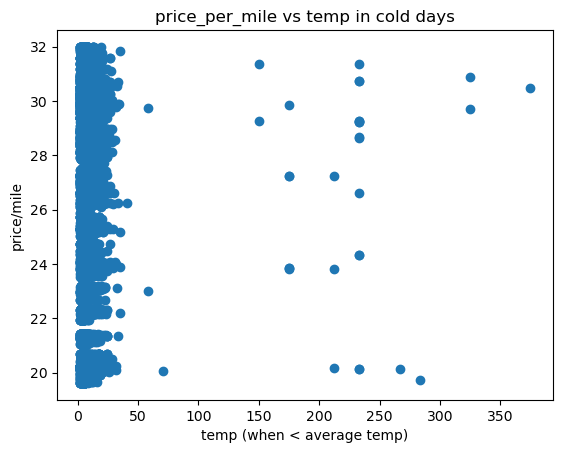

In [101]:
#looking at scatter plot between temp and price_per_distance
plt.scatter(uber_cold_rides.price_per_distance, uber_cold_rides.temp)
plt.title("price_per_mile vs temp in cold days")
plt.xlabel("temp (when < average temp)")
plt.ylabel("price/mile")
plt.show()

In [102]:
#now conducting hypothesis testing:
stat, pval = ttest_1samp(uber_cold_rides.price_per_distance, 6.59)
print('stat is  ', stat)
print('pvalue for the one-tailed test is ', pval/2) #cannot reject null hypothesis.

stat is   -1.4563904230915787
pvalue for the one-tailed test is  0.07264746146599352


In [103]:
average_temp = uber_cold_rides['price_per_distance'].mean()
difference = round((average_temp/average_price_uber_df - 1 )*100,1)
print("the average price/mile during cold days ", average_temp)
print("the average price/mile during cold days tends to be ", difference, "% lower relative to the average price/mile in the whole dataset")

the average price/mile during cold days  6.52356708454166
the average price/mile during cold days tends to be  -1.0 % lower relative to the average price/mile in the whole dataset


#### Temp hypothesis 2: rides when temperature is below 23 F (-5 C).
- **Ho** = price/mile on rides with temp below 23 F >= 6.59 (average price/mile for the whole dataset)
- **H1** = price/mile on rides with temp below 23 F < 6.59 (average price/mile for the whole dataset)

In [104]:
#really cold days
uber_really_cold_rides = uber_df[uber_df['temp']<23]
uber_really_cold_rides

,distance,destination,source,price,name,temp,clouds,pressure,rain,humidity,wind,datetime,day,hour,price_per_distance
6,2.48,business,entertaiment,8.5,UberX,20.03,0.43,1031.07,0.0,0.63,3.80,2018-12-13 10:40:11.530999808,3,10,3.427419
12,1.16,entertaiment,commercial,9.5,WAV,20.21,0.62,1030.21,0.0,0.61,3.81,2018-12-13 08:10:06.983000064,3,8,8.189655
37,1.57,commercial,entertaiment,8.0,UberX,21.30,0.30,1028.28,0.0,0.56,4.98,2018-12-13 06:20:06.887000064,3,6,5.095541
152,1.57,commercial,entertaiment,9.0,UberPool,21.39,0.19,1033.72,0.0,0.60,2.90,2018-12-13 13:25:03.428000000,3,13,5.732484
166,1.58,business,business,6.5,UberPool,20.15,0.39,1030.70,0.0,0.64,3.93,2018-12-13 09:35:08.968000000,3,9,4.113924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219333,0.49,business,commercial,7.0,WAV,22.20,0.07,1027.97,0.0,0.51,5.10,2018-12-13 05:15:03.457999872,3,5,14.285714
219334,1.30,entertaiment,business,13.5,UberXL,22.35,0.07,1027.96,0.0,0.51,5.16,2018-12-13 05:15:03.457999872,3,5,10.384615
219347,3.37,education,business,18.0,UberXL,20.10,0.62,1030.21,0.0,0.61,3.79,2018-12-13 08:45:10.788000000,3,8,5.341246
219348,3.37,education,business,10.5,UberX,20.10,0.62,1030.21,0.0,0.61,3.79,2018-12-13 08:45:10.788000000,3,8,3.115727


In [105]:
#now conducting hypothesis testing:
stat, pval = ttest_1samp(uber_really_cold_rides.price_per_distance, 6.59)
print('stat is  ', stat)
print('pvalue for the one-tailed test is ', pval/2) #cannot reject null hypothesis.

stat is   -0.605957783125802
pvalue for the one-tailed test is  0.2722837394455086


In [106]:
average_temp = uber_really_cold_rides['price_per_distance'].mean()
difference = round((average_temp/average_price_uber_df - 1 )*100,1)
print("the average price/mile during cold days ", average_temp)
print("the average price/mile during cold days tends to be ", difference, "% lower relative to the average price/mile in the whole dataset")

the average price/mile during cold days  6.5235514542460145
the average price/mile during cold days tends to be  -1.0 % lower relative to the average price/mile in the whole dataset


- I cannot reject the null hypothesis and the calculations show that the average price during either cold of really cold days do not alter the average price/mile.
- This is probably affected by the period when the data was taken, which was the last week of November.
- Cold days are not really an anomaly during this period in Boston and therefore it does not seem to alter the average price/mile.

#### Looking at the impact of  wind to prices
- For this, I will simply test whether the average price per mile changes in windy days, defined as days when the wind is above the Q75 of the wind distribution.
- As an additional step, I will also test the average price per mile during really windy days, defined as days when the wind is above the Q95 of the wind distribution.

In [107]:
#first I need to calculate the references that will be used in the hypothesis (Q75 and Q95 of wind)
wind_q75 = uber_df['wind'].quantile(0.75)
wind_q95 = uber_df['wind'].quantile(0.95)
print("the Q75 of the wind distribution is ", wind_q75)
print("the Q95 of the wind distribution is ", wind_q95)

the Q75 of the wind distribution is  9.8775
the Q95 of the wind distribution is  13.01


#### Wind hypothesis 1: rides when wind is above 9.87 (Q75 of 'wind')
- **Ho** = price/mile on rides with wind above 9.87 >= 6.59 (average price/mile for the whole dataset)
- **H1** = price/mile on rides with wind above 9.87 < 6.59 (average price/mile for the whole dataset)

In [108]:
uber_windy = uber_df[uber_df['wind']>wind_q75]
uber_windy

,distance,destination,source,price,name,temp,clouds,pressure,rain,humidity,wind,datetime,day,hour,price_per_distance
2,1.11,entertaiment,commercial,7.5,WAV,42.360000,1.000000,1012.150000,0.20880,0.770,11.460000,2018-12-16 23:55:11.430000128,6,23,6.756757
3,1.11,entertaiment,commercial,5.5,UberPool,42.480000,0.580000,1007.660000,0.00000,0.540,10.840000,2018-11-29 19:18:00.802000128,3,19,4.954955
7,2.48,business,entertaiment,7.0,UberPool,39.710000,0.720000,1000.380000,0.00000,0.700,10.040000,2018-12-17 22:25:12.519000064,0,22,2.822581
8,2.94,other,business,9.5,WAV,38.650000,0.466667,991.750000,0.00000,0.670,11.320000,2018-11-28 14:23:07.719000064,2,14,3.231293
15,1.16,entertaiment,commercial,13.0,UberXL,37.824286,0.771429,1000.305714,0.00000,0.700,10.247143,2018-11-29 06:57:57.639000064,3,6,11.206897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219395,0.91,entertaiment,commercial,7.0,UberX,38.454000,0.614000,997.475000,0.00020,0.711,10.238000,2018-11-29 01:47:08.122999808,3,1,7.692308
219396,1.79,entertaiment,commercial,14.0,UberXL,38.484000,0.613000,997.468000,0.00020,0.709,10.257000,2018-11-29 01:47:08.122999808,3,1,7.821229
219397,1.79,entertaiment,commercial,8.5,UberPool,38.484000,0.613000,997.468000,0.00020,0.709,10.257000,2018-11-29 01:47:08.122999808,3,1,4.748603
219398,0.91,entertaiment,commercial,7.0,WAV,38.454000,0.614000,997.475000,0.00020,0.711,10.238000,2018-11-29 01:47:08.122999808,3,1,7.692308


In [109]:
#now conducting hypothesis testing:
stat, pval = ttest_1samp(uber_windy.price_per_distance, 6.59)
print('stat is  ', stat)
print('pvalue for the one-tailed test is ', pval/2) #cannot reject null hypothesis.

stat is   0.4632793875662935
pvalue for the one-tailed test is  0.3215829790372717


In [110]:
average_wind = uber_windy['price_per_distance'].mean()
difference = round((average_wind/average_price_uber_df - 1 )*100,1)
print("the average price/mile during windy days is", average_wind)
print("the average price/mile during windy days tends to be ", difference, "% higher relative to the average price/mile in the whole dataset")

the average price/mile during windy days is 6.606457288764146
the average price/mile during windy days tends to be  0.2 % higher relative to the average price/mile in the whole dataset


#### Wind hypothesis 2: rides when wind is above 13.01 (Q95 of 'wind')
- **Ho** = price/mile on rides with wind above 13.01 >= 6.59 (average price/mile for the whole dataset)
- **H1** = price/mile on rides with wind above 13.01 < 6.59 (average price/mile for the whole dataset)

In [111]:
uber_really_windy = uber_df[uber_df['wind']>wind_q95]
uber_really_windy

,distance,destination,source,price,name,temp,clouds,pressure,rain,humidity,wind,datetime,day,hour,price_per_distance
16,2.67,entertaiment,commercial,9.5,WAV,25.42,0.77,1006.29,0.0,0.53,18.18,2018-12-18 10:50:11.032999936,1,10,3.558052
33,3.07,business,other,8.5,UberPool,27.23,0.80,1006.12,0.0,0.54,17.08,2018-12-18 09:40:08.048000000,1,9,2.768730
48,3.05,other,business,17.5,UberXL,30.83,0.00,1012.32,0.0,0.46,13.09,2018-12-18 18:00:08.342000128,1,18,5.737705
50,2.32,commercial,entertaiment,14.0,UberXL,33.60,0.99,1002.47,0.0,0.61,13.22,2018-12-18 06:30:13.808000000,1,6,6.034483
51,2.32,commercial,entertaiment,9.5,WAV,23.83,0.64,1006.85,0.0,0.53,16.13,2018-12-18 11:55:09.377000192,1,11,4.094828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219239,1.80,education,entertaiment,9.0,UberX,30.81,0.00,1012.32,0.0,0.46,13.15,2018-12-18 18:40:03.538000128,1,18,5.000000
219271,1.80,education,entertaiment,9.5,UberX,28.32,0.97,1005.31,0.0,0.56,15.61,2018-12-18 08:40:06.867000064,1,8,5.277778
219272,1.56,entertaiment,education,7.5,UberPool,28.49,0.98,1005.36,0.0,0.55,15.23,2018-12-18 08:40:06.867000064,1,8,4.807692
219361,3.23,entertaiment,education,10.5,WAV,55.28,0.47,999.25,0.0,0.68,16.57,2018-12-03 16:22:56.660999936,0,16,3.250774


In [112]:
#now conducting hypothesis testing:
stat, pval = ttest_1samp(uber_really_windy.price_per_distance, 6.59)
print('stat is  ', stat)
print('pvalue for the one-tailed test is ', pval/2) #cannot reject null hypothesis.

stat is   -0.04901457012136667
pvalue for the one-tailed test is  0.4804542905873016


In [113]:
average_wind = uber_really_windy['price_per_distance'].mean()
difference = round((average_wind/average_price_uber_df - 1 )*100,1)
print("the average price/mile during really windy days is", average_wind)
print("the average price/mile during really windy days tends to be ", difference, "% lower relative to the average price/mile in the whole dataset")

the average price/mile during really windy days is 6.586426574345703
the average price/mile during really windy days tends to be  -0.1 % lower relative to the average price/mile in the whole dataset


- I cannot reject the null hypothesis and the calculations show that the average price during either windy of really windy days do not alter the average price/mile.
- As in the case of temperature, this is probably affected by the period when the data was taken.

## Preliminary conclusions...
- After the preliminary analysis of the data, I decided to focus only for rides provided by Uber excluding  the luxury service (Black and Black SUV).
- To accommodate for the positive correlation between price and distance, I also decided to focus on price per mile to gauge how this could be affected by demand/supply patterns during the day or week or by weather conditions.
- My preliminary assessment is that the average price/mile tends not to change significantly when looking at daily averages or hourly averages during the week, with some exceptions (e.g. Friday 6pm, when the average price/mile increases by 27% compared to the daily average).
- In order to look at these atypical cases, I tested a number of hypothesis that aimed to focus the analysis in rides in periods of the week when it could be expected a rise in demand, with the following main findings: 
    * During morning rush hours (7am-10am, Monday-Thursday), the average price/mile for rides with a destination to a business district tends to be 15% higher relative to the average price/mile for the entire dataset.
    * During afternoon rush hours (4pm-8pm, Monday-Thursday), the average price/mile for rides with a source location in a business district tends to be 7% higher relative to the average price/mile for the entire dataset.
    * There is also some evidence that the average price/mile tends to also increase during busy leisure hours (6pm-10pm) on Friday or Saturday that have a destination to an entertainment district. But the average increase (6% of Fridays and 5% on Saturdays) is lower than the rise during the rush morning/afternoon hours.
    * Finally, on Sundays there is some evidence that the average price/mile tends to be marginally lower relative to the average price/mile for the whole dataset (only -1%).
- In terms of weather, the evidence suggests that unfavourable weather conditions do not really affect significantly the average price/mile, with perhaps the exception of rides under extreme rainy conditions, when the average price/mile could increase by near 30%. There were also no evidence of an impact of the wind or the temperature in the average price/mile. The somewhat muted effect of the weather to prices could be influenced by the period when the data was taken (late November 2018), when weather conditions tend to be generally not favourable (cold & rainy) in Boston.

## ... and further steps
- Saving the uber_df into a CSV file and a SQL database.
- The CSV file will be used for data visualisation of these findings using Tableau.
- The SQL database will be imported in a separate notebook to tackle objectives (4) Machine Learning Regression Modelling , (5) Model Evaluation and Selection and (6) Analyse Model Parameters and Conclude. 

In [114]:
#saving uber_df into CSV file for Tableau
uber_df.to_csv('uber_df.csv', index=False)

In [123]:
#saving uber_df into CSV file for Tableau
import pymysql
from sqlalchemy import create_engine
import getpass # To get the password without showing the input
password = getpass.getpass("Please enter the SQL database password: ")

Please enter the SQL database password: ········


In [126]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/project'
engine = create_engine(connection_string)
uber_df.to_sql(name='uber_df', con=engine, schema=None, if_exists='replace', index=False)

219407

### Note: the analysis continuos in Notebook 'Ride_hailing_prices_notebook2'